# PISA Data Exploration
## by Ken Norton

PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school.

Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science representing about 28 million 15-year-olds globally. 

My questions:

* Does the age when a child begins learning the language the test was given in affect their performance?
* Do children in freer countries perform differently than those in less free countries?
* Does economic, social, and cultural status – advantage vs. disadvantage – relate to academic performance?

## Preliminary Wrangling

## Load Data

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
# Plot styles
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-poster')

# We have a lot of columns in our data set
pd.set_option('display.max_columns', 650)
pd.set_option('display.max_rows', 650)
pd.set_option('display.width', 1000)

In [3]:
# Using low_memory=False here to suppress the dtype errors
# per: https://stackoverflow.com/a/40585000
df = pd.read_csv('data/pisa2012.csv', low_memory=False, encoding='latin1')

In [4]:
# Import the freedom scores
df_free = pd.read_csv('data/Freedom_in_the_World_2012.csv')

## Assessment

In [5]:
# High level inspection
df.shape

(485490, 636)

In [6]:
df.sample(5)

Unnamed: 0                   CNT  SUBNATIO  STRATUM      OECD                         NC  SCHOOLID  STIDSTD  ST01Q01  ST02Q01  ST03Q01  ST03Q02 ST04Q01                      ST05Q01  ST06Q01    ST07Q01    ST07Q02    ST07Q03                ST08Q01                ST09Q01  ST115Q01 ST11Q01 ST11Q02 ST11Q03 ST11Q04 ST11Q05 ST11Q06            ST13Q01 ST14Q01 ST14Q02 ST14Q03 ST14Q04                             ST15Q01            ST17Q01 ST18Q01 ST18Q02 ST18Q03 ST18Q04                       ST19Q01          ST20Q01          ST20Q02          ST20Q03  ST21Q01               ST25Q01 ST26Q01 ST26Q02 ST26Q03 ST26Q04 ST26Q05 ST26Q06 ST26Q07 ST26Q08 ST26Q09 ST26Q10 ST26Q11 ST26Q12 ST26Q13 ST26Q14  ST26Q15  ST26Q16  ST26Q17        ST27Q01        ST27Q02        ST27Q03        ST27Q04 ST27Q05        ST28Q01   ST29Q01   ST29Q02   ST29Q03   ST29Q04         ST29Q05         ST29Q06         ST29Q07         ST29Q08 ST35Q01         ST35Q02   ST35Q03         ST35Q04         ST35Q05         ST35Q06  \
30720        30721             Australia    360000  AUS0411      OECD                  Australia       462     8570       10      1.0        2     1997  Female   Yes, for one year or less       NaN  No, never  No, never  No, never                    NaN                    NaN       NaN     Yes     Yes     Yes     Yes      No      No  <ISCED level 3A>      NaN     NaN     NaN     NaN  Other (e.g. home duties, retired)   <ISCED level 3A>       No     Yes     NaN     NaN  Working full-time <for pay>   Country of test    Other country    Other country      NaN  Language of the test     Yes     Yes      No     Yes     NaN     Yes     Yes     Yes     Yes      No     NaN     Yes      No     Yes    36001    36001    36002  Three or more  Three or more            One            Two     Two  26-100 books   Disagree  Disagree  Disagree  Disagree           Agree        Disagree        Disagree           Agree   Agree        Disagree  Disagree           Agree        Disagree        Disagree   
84210        84211                Canada   1240000  CAN0652      OECD                    Canada        397     9741       10      2.0        7     1996  Female  Yes, for more than one year      5.0  No, never  No, never  No, never  Three or four times    Three or four times         1.0     Yes     Yes     Yes      No      No      No  <ISCED level 3A>       No      No      No      No        Working full-time <for pay>    <ISCED level 1>       No      No      No      No  Working full-time <for pay>   Country of test  Country of test  Country of test      NaN  Language of the test     Yes     Yes     Yes     Yes     Yes     Yes     NaN     Yes     Yes     Yes     NaN     Yes     Yes     Yes   124001   124001   124001  Three or more  Three or more            Two  Three or more     One  26-100 books        NaN       NaN       NaN       NaN             NaN             NaN             NaN             NaN     NaN             NaN       NaN             NaN             NaN             NaN   
117907      117908              Colombia   1700000  COL0101  Non-OECD                  Colombia        148     3809       10      2.0        8     1996  Female   Yes, for one year or less       6.0        NaN  Yes, once        NaN  Three or four times                   None         1.0     Yes     Yes     Yes      No      No     Yes  <ISCED level 3A>      NaN     NaN     Yes     NaN  Other (e.g. home duties, retired)   <ISCED level 3A>      NaN     Yes     NaN     NaN  Working full-time <for pay>   Country of test  Country of test  Country of test      NaN  Language of the test     Yes     Yes     Yes     Yes     Yes     Yes      No     Yes     Yes     Yes     Yes     Yes     Yes     Yes   170001   170001   170001  Three or more  Three or more            One            One    None   11-25 books      Agree     Agree     Agree     Agree           Agree           Agree           Agree           Agree   Agree        Disagree  Disagree  Strongly agree  Strongly agree           Agree   
190097      190098      

In [7]:
df.describe()

Unnamed: 0      SUBNATIO       SCHOOLID        STIDSTD        ST01Q01        ST02Q01        ST03Q01        ST03Q02        ST06Q01       ST115Q01       ST21Q01       ST26Q15       ST26Q16       ST26Q17        ST57Q01        ST57Q02        ST57Q03        ST57Q04        ST57Q05        ST57Q06        ST69Q01        ST69Q02        ST69Q03        ST70Q01        ST70Q02        ST70Q03        ST71Q01        ST72Q01       ST101Q01       ST101Q02      ST101Q03       ST101Q05       ST104Q01       ST104Q04       ST104Q05       ST104Q06        IC05Q01        IC06Q01        IC07Q01       EC04Q01A       EC04Q01B       EC04Q01C       EC04Q02A       EC04Q02B       EC04Q02C       EC04Q03A       EC04Q03B       EC04Q03C       EC04Q04A      EC04Q04B       EC04Q04C       EC04Q05A       EC04Q05B       EC04Q05C       EC04Q06A       EC04Q06B       EC04Q06C      CLCUSE301      CLCUSE302        DEFFORT            AGE          GRADE         ANXMAT         ATSCHL       ATTLNACT         BELONG  \
count  485490.000000  4.854900e+05  485490.000000  485490.000000  485490.000000  485438.000000  485490.000000  485490.000000  457994.000000  479269.000000  32728.000000  4.854900e+05  4.854900e+05  4.854900e+05  301367.000000  269808.000000  283813.000000  279657.000000  289502.000000  289428.000000  299618.000000  298601.000000  291943.000000  296878.000000  298339.000000  289068.000000  255665.000000  294163.000000  311290.000000  310906.000000  310321.00000  310655.000000  310449.000000  309969.000000  310366.000000  310156.000000  485490.000000  485490.000000  485490.000000  169730.000000  169765.000000  169779.000000  169783.000000  169784.000000  169798.000000  169796.000000  169786.000000  169799.000000  169655.000000  169641.00000  169656.000000  169716.000000  169716.000000  169725.000000  169643.000000  169640.000000  169636.000000  485490.000000  485490.000000  485490.000000  485374.000000  484617.000000  314764.000000  312584.000000  311675.000000  313399.000000   
mean   242745.500000  4.315457e+06     240.152197    6134.066201       9.813323       2.579260       6.558512    1996.070061       6.148963       1.265356      6.481117  7.103064e+05  7.268785e+05  8.130810e+05       5.493770       1.623629       0.954044       0.911821       1.213363       1.583081      52.744331      52.911273      52.722812       4.228060       4.350246       4.047826      31.138885      26.017759       1.831800       2.026944       2.83132       2.180995       1.879072       2.834719       1.963050       1.930719      39.524894      40.569633      41.019310       1.648448       1.462251       1.850506       1.755941       1.470916       1.761770       1.641782       1.698255       1.663773       1.737544       1.68622       1.583711       1.666631       1.568732       1.745824       1.777203       1.717301       1.517467      18.799584      19.917745      13.867758      15.784283      -0.162964       0.152647       0.051644       0.041384      -0.022259   
std    140149.035431  2.524434e+06     278.563016    6733.144944       3.734726       2.694013       3.705244       0.255250       0.970693       0.578992      4.579245  1.583832e+06  1.629829e+06  1.811846e+06       5.383815       2.591569       2.162574       2.362377       2.353292       2.760885      16.903873      17.007616      16.635498       1.652415       1.652565       2.539119       9.090506       9.223134       0.891414       0.914075       0.97202       0.909405       0.805788       0.998822       0.885696       0.854910      46.390983      45.463542      45.306261       0.477456       0.498574       0.356576       0.429529       0.499155       0.426002       0.479478       0.459016       0.472419       0.439971       0.46403       0.492944       0.471418       0.495255       0.435398       0.416125       0.450312       0.499696      29.807876      29.078596      32.474850       0.290221       0.655558       0.955031       1.002942       0.997704       0.983503   
min         1.000000  8.000000e+04       1

In [8]:
df_free.sample(5)

country  SUBNATIO  political_rights  civil_liberties freedom_status
64      Spain   7241000                 1                1              F
17    Denmark   2080000                 1                1              F
45       Peru   6040000                 2                3              F
2   Argentina    320100                 2                2              F
21    Germany   2760000                 1                1              F

In [9]:
df_free.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 5 columns):
country             86 non-null object
SUBNATIO            86 non-null int64
political_rights    86 non-null int64
civil_liberties     86 non-null int64
freedom_status      86 non-null object
dtypes: int64(3), object(2)
memory usage: 3.4+ KB


### What is the structure of your dataset?

The set has **485,490 rows** representing individual students in the survey. There are **636 columns** that contain data about lots of different factors about the student, there they live, their economic, social, and cultural status, their attitudes about learning, and their performance on a panel of math, reading, and science assessments. Many of the qualitative columns contain contain string values that represent a scale (e.g. "Never" -> "Every day"). There's a wealth of data here!

### What is/are the main feature(s) of interest in your dataset?

The features of interest from the PISA dataset to me are primarily:

* `NC` - country code (there is another code called CNT but that seems to include sub-regions, such as Florida and Massachusetts)
* `ST04Q01` - the student's gender (Male or Female)
* `PV1MATH-PV5MATH` - plausible values that represent scores on the mathematic section
* `PV1READ-PV5READ` - plausible values that represent scores on the reading section
* `PV1SCIE-PV5SCIE` - plausible values that represent scores on the science section
* `EC06Q01` - the year the student began learning the language the test was given in
* `ESCS` - a single index that combines several economic, social and cultural status factors. It's expressed as +/- standard deviations from the mean of population (where 0 = mean). The index of ESCS was used first in the PISA 2000 analysis and at that time was derived from five indices: highest occupational
status of parents (HISEI), highest educational level of parents (in years of education according to ISCED), family wealth,
cultural possessions and home educational resources (all three WLEs based on student reports on home possessions). The ESCS scores were obtained as component scores for the first principal component with zero being the score of an average OECD student and one being the standard deviation across equally weighted OECD countries.

And from the _Freedom House_ dataset I'll be using:

* `political_rights` - degree of a country's political freedom, scale of 1=most free to 7=least free
* `civil_liberties` - degree of a country's civil liberties, scale of 1=most free to 7=least free
* `freedom_status` - a single overall rating of the country's freedom, F, PF, and NF stand for Free, Partly Free, and Not Free

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

For my assessment, I'll be using `ESCS` to represent student economic, social, and cultural status. I'll be creating new values to average each of the 5 math, reading, and science tests into single scores for each subject. I'll also be looking at these factors against the _Freedom House_ freedom scores.

## Cleaning

In [10]:
# Make a copy for cleaning
df_clean = df.copy()

I noticed several of the string values leading or trailing spaces. The `NC` (country) column is the only affected one I'll be using.

In [11]:
# Trim trailing/leading spaces from the country names
df_clean['NC'] = df_clean['NC'].apply(lambda x: x.strip())


### Freedom House data

Now I'm going to join the Freedom House data

In [12]:
# Join the Freedom House data, drop the dupe country column
df_clean = pd.merge(df_clean, df_free, left_on='SUBNATIO', right_on='SUBNATIO')
df_clean.drop(columns=['country'], inplace=True)


In [13]:
df_clean['civil_liberties'].corr(df_clean['political_rights'])

0.9321221136849408

The `civil_liberties` and `political_rights` values are very highly positively correlated, so I'm only going to use `civil_liberties` in my analysis. A value that reflects individual freedom is most relevant to individual academic performance.

### Math/Reading/Science/Overall Literacy Scores

From the [PISA Data Visualization Contest instructions](https://www.oecd.org/pisa/pisaproducts/datavisualizationcontest.htm): "Pupil performance in mathematics, reading and science is coded by plausible values. You can find them in columns: `PV1MATH-PV5MATH` (for math), `PV1READ-PV5READ` (for reading) and `PV1SCIE-PV5SCIE` (for science). For given area all five values PV1-PV5 are just independent estimations of the student performance in given area. For exploration it is fine to use only PV1."

Based on this, I've decided to use the average of each of the five scores in each category as an overall "literacy" value. I then compute the average of *all* questions to stand as an overall literacy score.

In [14]:
# Each score is scaled to a mean of 500 and a standard deviation of 100

# Average of the five MATH assessment scores
df_clean['math_literacy'] = (
    (df_clean['PV1MATH'] + df_clean['PV2MATH'] + df_clean['PV3MATH'] +
     df_clean['PV4MATH'] + df_clean['PV5MATH']) / 5)

# Average of the five READING assessment scores
df_clean['read_literacy'] = (
    (df_clean['PV1READ'] + df_clean['PV2READ'] + df_clean['PV3READ'] +
     df_clean['PV4READ'] + df_clean['PV5READ']) / 5)

# Average of the five SCIENCE assessment scores
df_clean['sci_literacy'] = (
    (df_clean['PV1SCIE'] + df_clean['PV2SCIE'] + df_clean['PV3SCIE'] +
     df_clean['PV4SCIE'] + df_clean['PV5SCIE']) / 5)

# Average of all assessment scores
df_clean['overall_literacy'] = (
    (df_clean['PV1MATH'] + df_clean['PV2MATH'] + df_clean['PV3MATH'] +
     df_clean['PV4MATH'] + df_clean['PV5MATH'] + df_clean['PV1READ'] +
     df_clean['PV2READ'] + df_clean['PV3READ'] + df_clean['PV4READ'] +
     df_clean['PV5READ'] + df_clean['PV1SCIE'] + df_clean['PV2SCIE'] +
     df_clean['PV3SCIE'] + df_clean['PV4SCIE'] + df_clean['PV5SCIE']) / 15)

### Age Started Learning Language

In [15]:
# EC06Q01 = age started learning
df_clean.EC06Q01.unique()

array([nan, '0 to 3 years', '4 to 6 years', '10 to 12 years',
       '7 to 9 years', '13 years or older'], dtype=object)

In [16]:
# Convert the EC06Q01 field to an ordered dtype
ordered_var = pd.api.types.CategoricalDtype(ordered=True,
                                            categories=[
                                                '0 to 3 years', '4 to 6 years',
                                                '7 to 9 years',
                                                '10 to 12 years',
                                                '13 years or older'
                                            ])

df_clean['EC06Q01'] = df_clean['EC06Q01'].astype(ordered_var)


In [17]:
# Test that the ordered dict dtype worked
df_clean['EC06Q01'].unique()

[NaN, 0 to 3 years, 4 to 6 years, 10 to 12 years, 7 to 9 years, 13 years or older]
Categories (5, object): [0 to 3 years < 4 to 6 years < 7 to 9 years < 10 to 12 years < 13 years or older]

### Advantaged/Disadvantaged Status

I'm considering a student to be "disadvantaged" if their ESCS score is -1 or more stdevs below the mean and advantaged if their scores is +1 stdev or more above the mean.

In [18]:
df_clean['disadvantaged'] = df_clean['ESCS'].dropna().apply(lambda x: 1
                                                            if x <= -1 else 0)

df_clean['advantaged'] = df_clean['ESCS'].dropna().apply(lambda x: 1
                                                            if x >= 1 else 0)

In [19]:
# Test new columns
# Expect: -1.0
print(df_clean.query('disadvantaged == 1')['ESCS'].max())

# Expect: 1.0
print(df_clean.query('advantaged == 1')['ESCS'].min())

-1.0
1.0


### Remove unused columns

Our dataframe is massive which can make it unwieldly to analyze. We're going to reduce it to only those columns we'll be using in our analysis.

In [20]:
df_clean = df_clean[[
    'STIDSTD', 'NC', 'ESCS', 'EC06Q01', 'ST04Q01', 'overall_literacy',
    'math_literacy', 'read_literacy', 'sci_literacy', 'civil_liberties',
    'disadvantaged', 'advantaged'
]]


In [21]:
df_clean.rename(columns={
    'STIDSTD': 'student_id',
    'NC': 'country',
    'EC06Q01': 'age_start_learn',
    'ST04Q01': 'gender'
},
                inplace=True)


In [22]:
df_clean.sample(5)

student_id   country  ESCS age_start_learn  gender  overall_literacy  math_literacy  read_literacy  sci_literacy  civil_liberties  disadvantaged  advantaged
385498        1970  Portugal -1.51             NaN  Female        472.980340      465.96820      486.59834     466.37448                1            1.0         0.0
335290       19588    Mexico -1.05             NaN    Male        496.585967      504.68140      493.33834     491.73816                3            1.0         0.0
465832         443    Turkey -2.58             NaN    Male        421.732353      398.66800      456.84984     409.67922                4            1.0         0.0
168521       10216     Spain -1.94             NaN  Female        401.054193      373.58624      416.54016     413.03618                1            1.0         0.0
439381        1698  Slovenia -0.94             NaN    Male        365.863327      375.45566      327.09514     395.03918                1            0.0         0.0

In [23]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480531 entries, 0 to 480530
Data columns (total 12 columns):
student_id          480531 non-null int64
country             480531 non-null object
ESCS                468689 non-null float64
age_start_learn     40345 non-null category
gender              480531 non-null object
overall_literacy    480531 non-null float64
math_literacy       480531 non-null float64
read_literacy       480531 non-null float64
sci_literacy        480531 non-null float64
civil_liberties     480531 non-null int64
disadvantaged       468689 non-null float64
advantaged          468689 non-null float64
dtypes: category(1), float64(7), int64(2), object(2)
memory usage: 44.5+ MB


In [24]:
# Save a copy of the cleaned dataframe
df_clean.to_csv('data/pisa2012_clean.csv')

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### Which countries did the students come from?

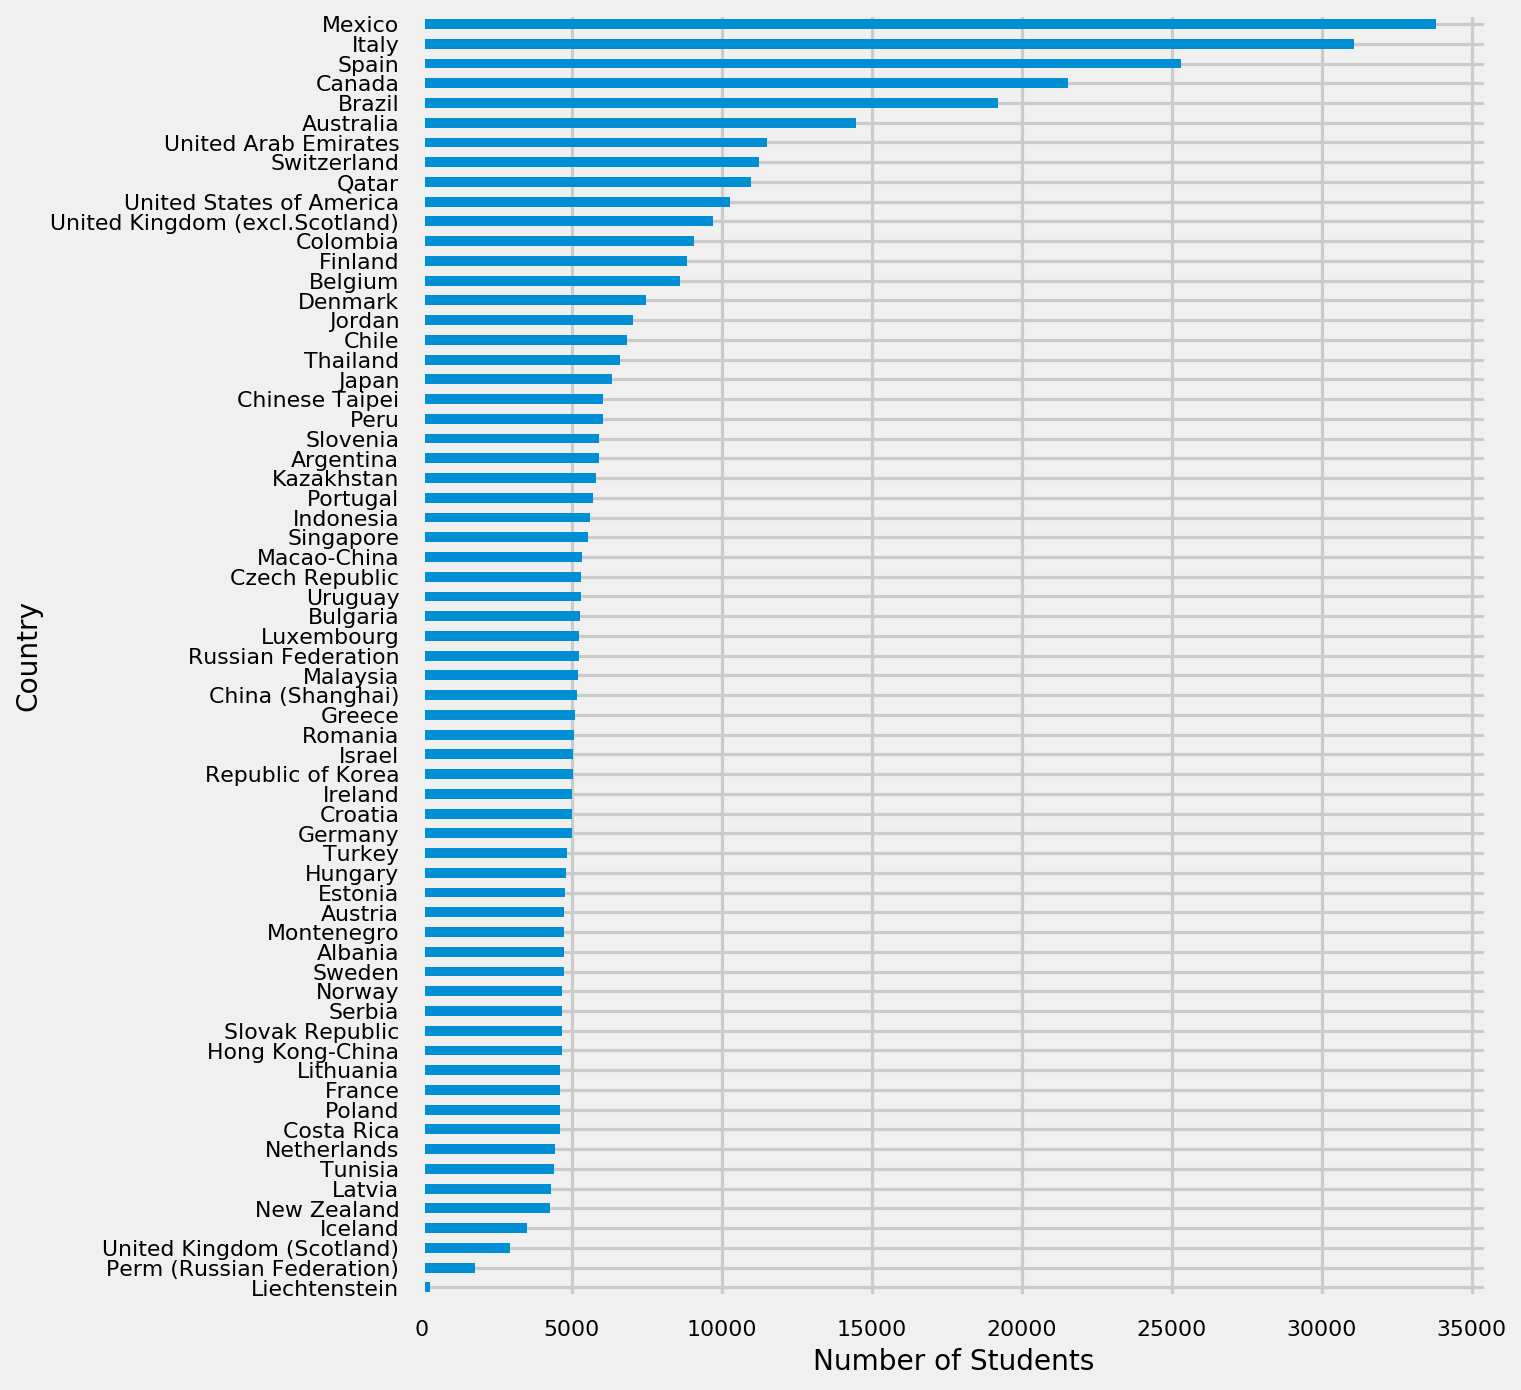

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(8.5, 11)
df_clean['country'].value_counts(ascending=True).plot(kind="barh", fontsize=11)
ax.set_ylabel("Country", fontsize=14)
ax.set_xlabel("Number of Students", fontsize=14)
plt.show()
fig.savefig("images/students-by-country.png")


### Which countries have the highest percentage of disadvantaged students?

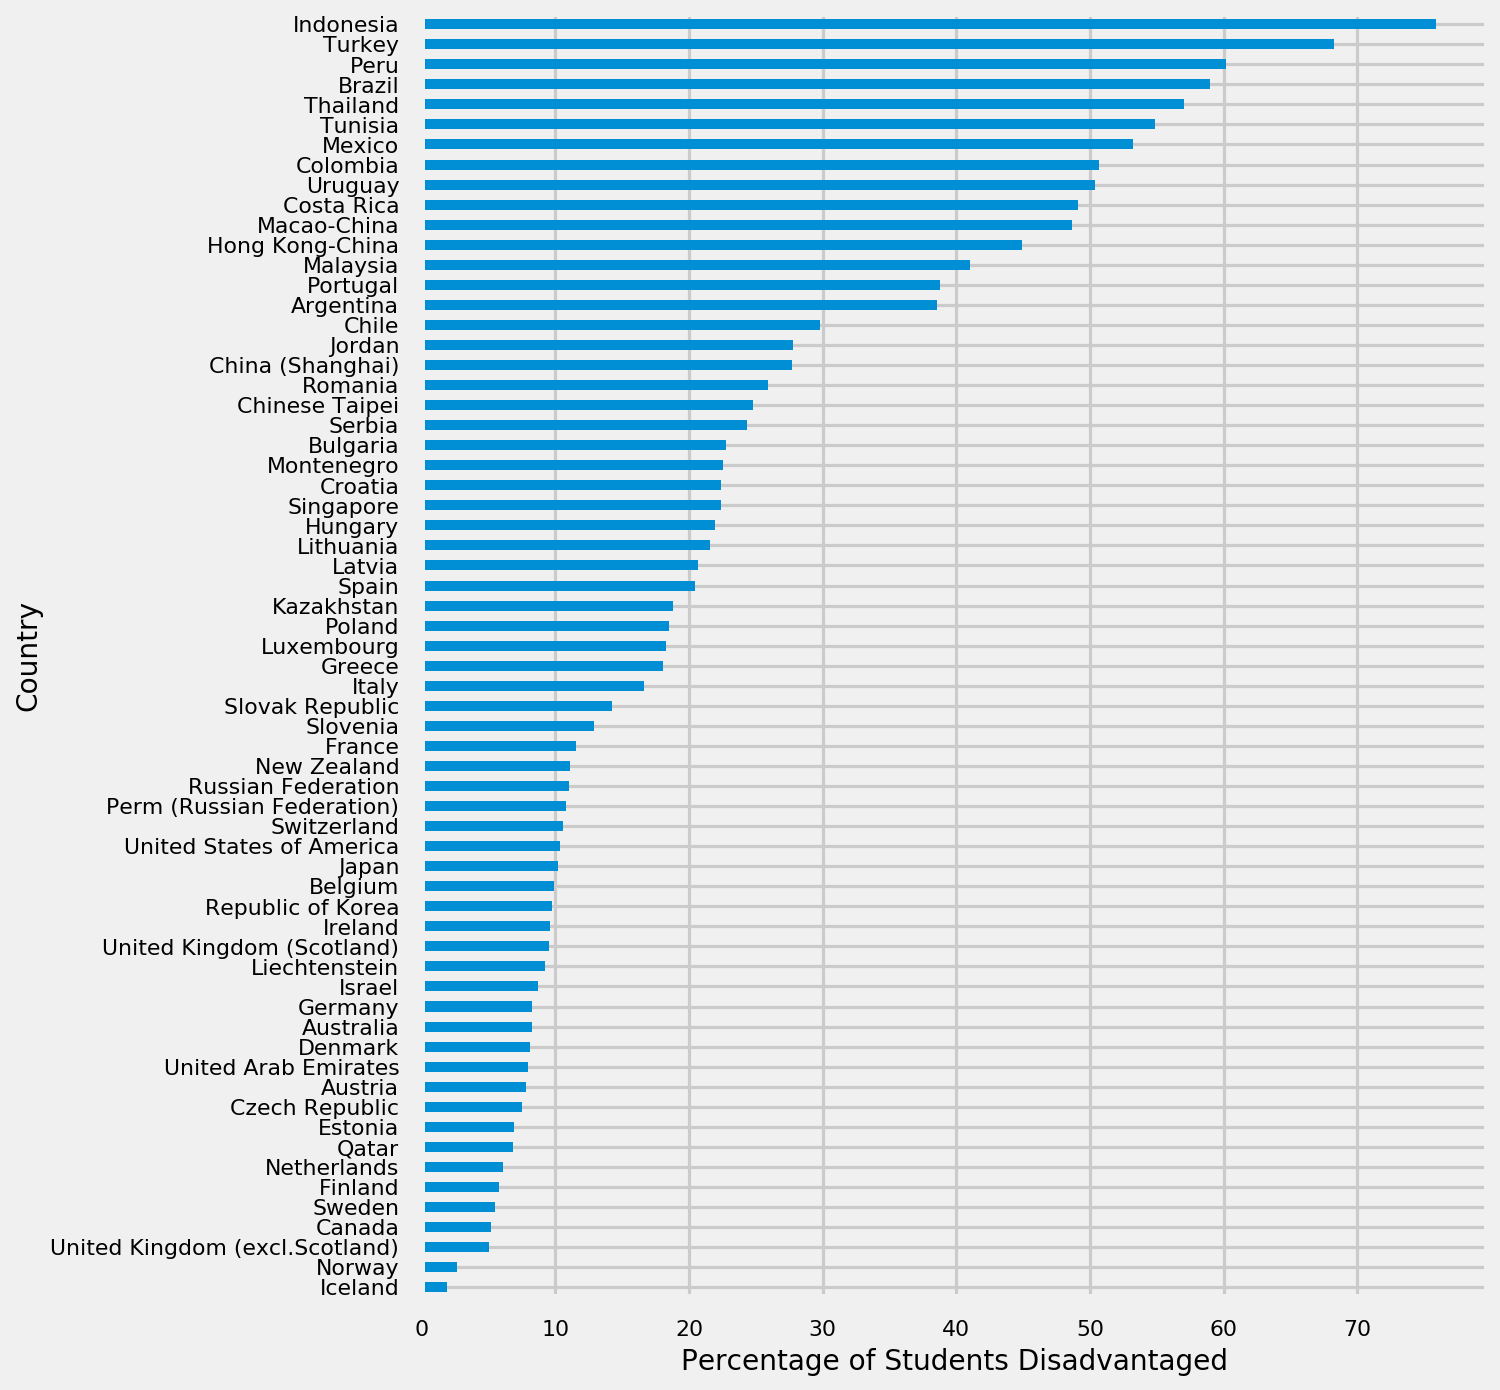

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(8.5, 11)
dt = (df_clean.query('disadvantaged == 1').groupby('country')['student_id'].count() /
      df_clean.groupby('country')['student_id'].count()).sort_values() * 100
dt.dropna().plot(kind="barh", fontsize=11)
ax.set_ylabel("Country", fontsize=14)
ax.set_xlabel("Percentage of Students Disadvantaged", fontsize=14)
plt.show()
fig.savefig("images/disadvantaged-students-by-country.png")


### Which countries have the highest percentage of advantaged students?

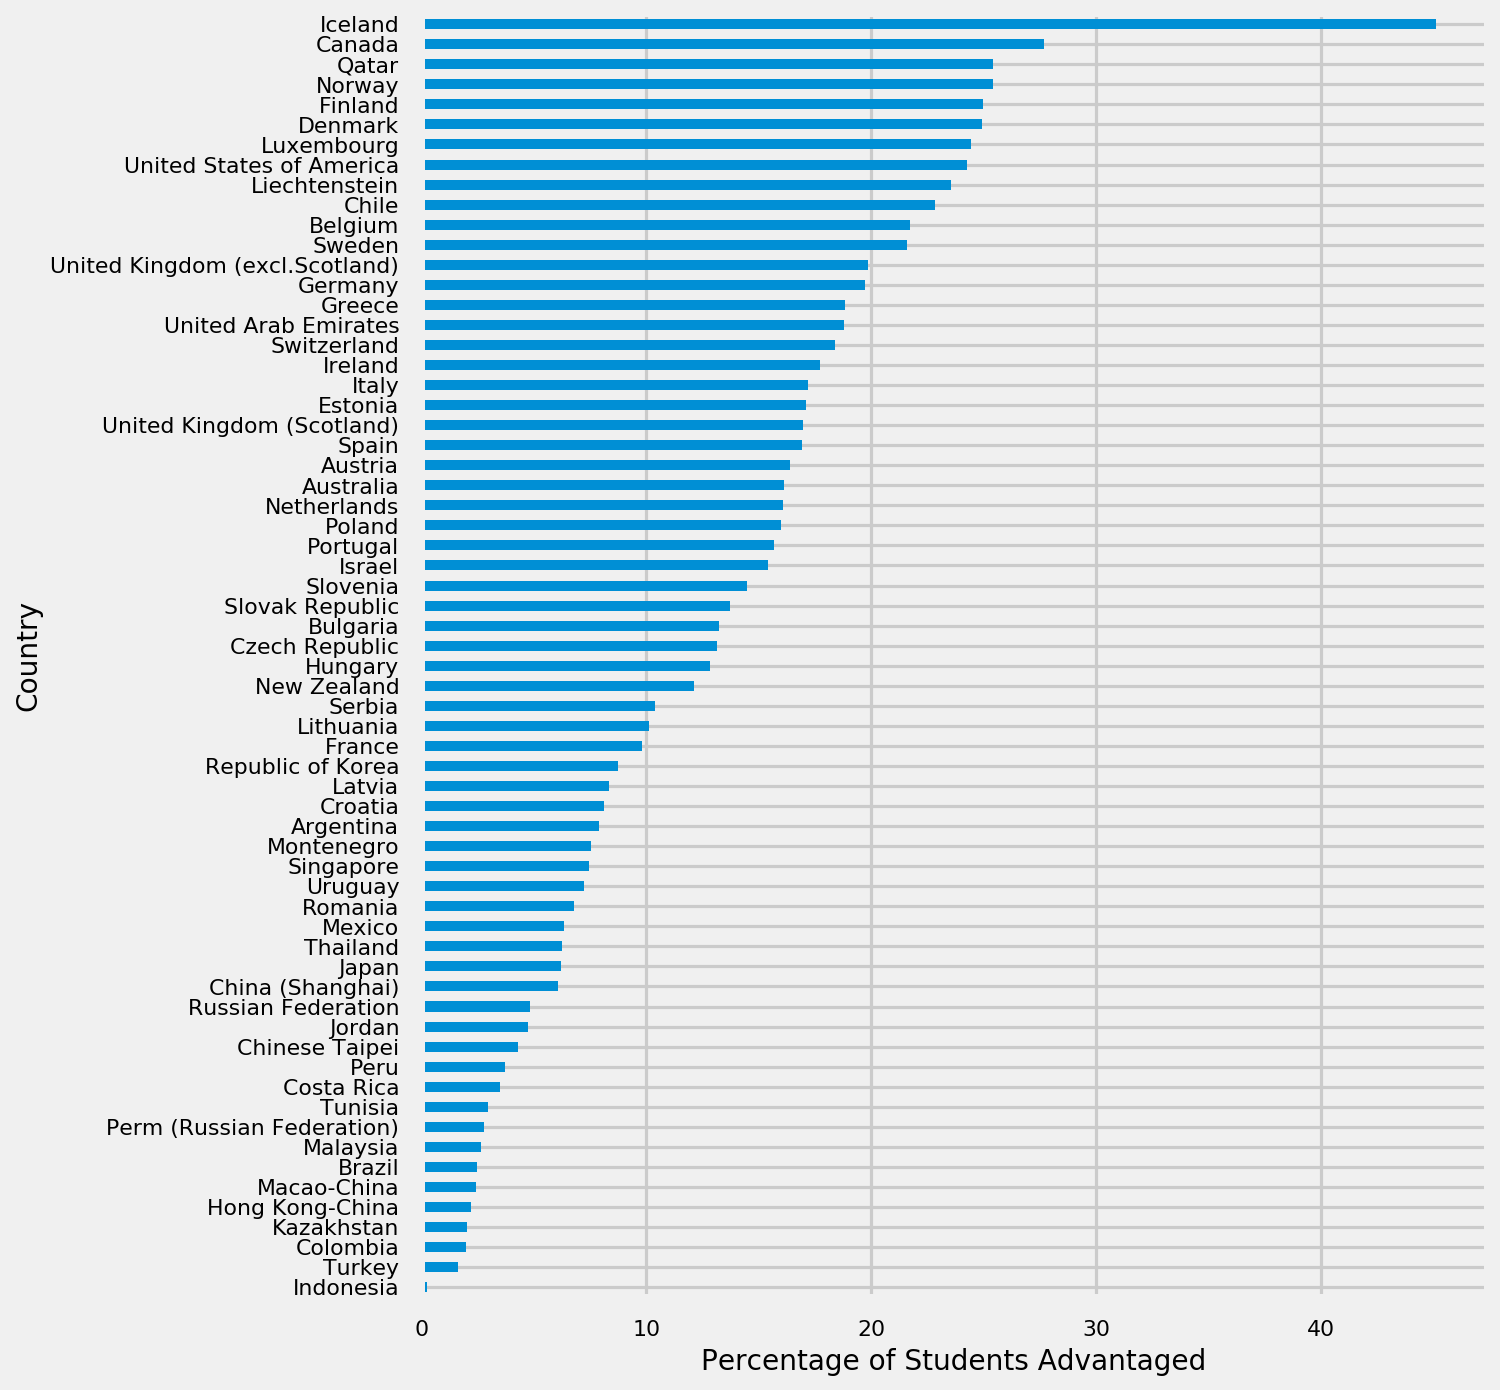

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(8.5, 11)
dt = (df_clean.query('advantaged == 1').groupby('country')['student_id'].count() /
      df_clean.groupby('country')['student_id'].count()).sort_values() * 100
dt.dropna().plot(kind="barh", fontsize=11)
ax.set_ylabel("Country", fontsize=14)
ax.set_xlabel("Percentage of Students Advantaged", fontsize=14)
plt.show()
fig.savefig("images/advantaged-students-by-country.png")


### Age Started Learning Language

In [28]:
df_clean['age_start_learn'].value_counts(normalize=True) * 100

0 to 3 years         64.617673
4 to 6 years         22.820672
7 to 9 years          7.420994
10 to 12 years        3.160243
13 years or older     1.980419
Name: age_start_learn, dtype: float64

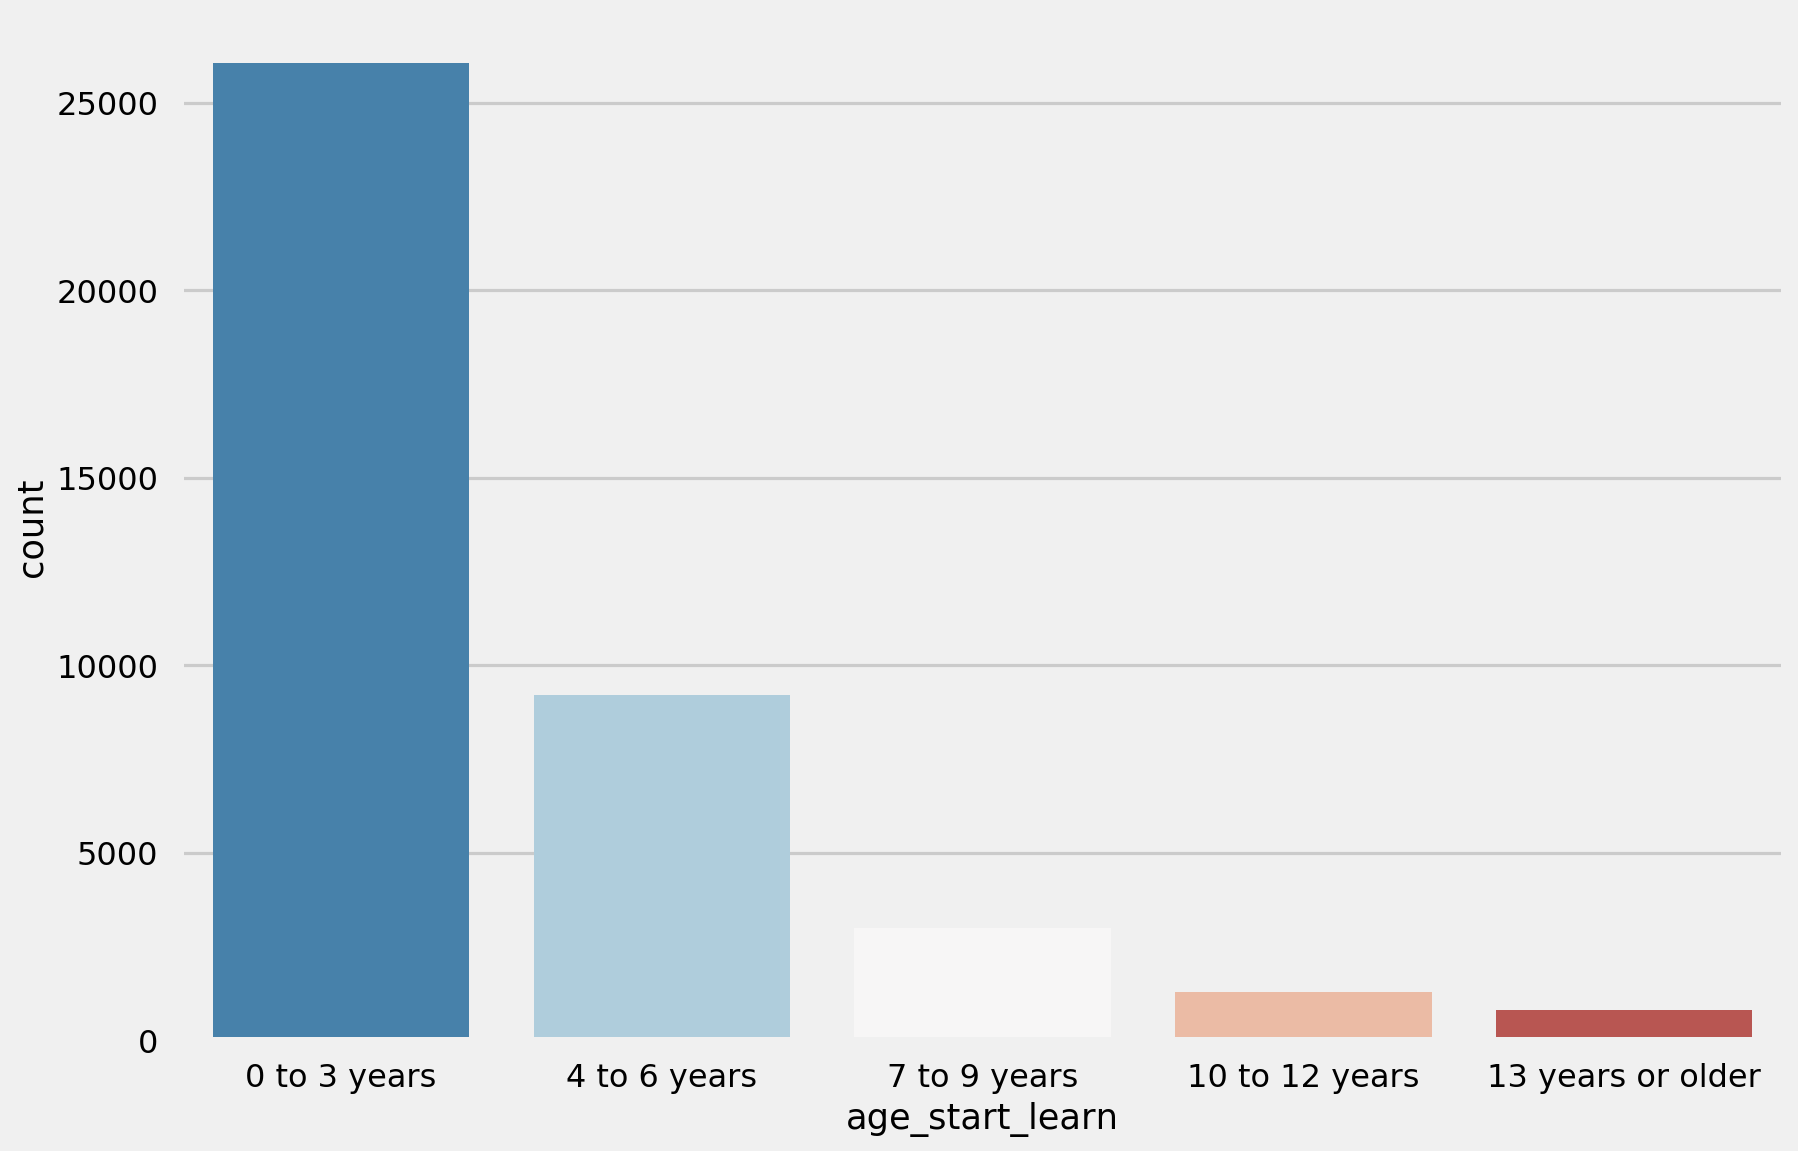

In [29]:
fig, ax = plt.subplots()
sns.countplot(data=df_clean, x='age_start_learn', palette='RdBu_r')
plt.show()
fig.savefig("images/age-started-learning.png")

### Overall Math/Reading/Science Scores

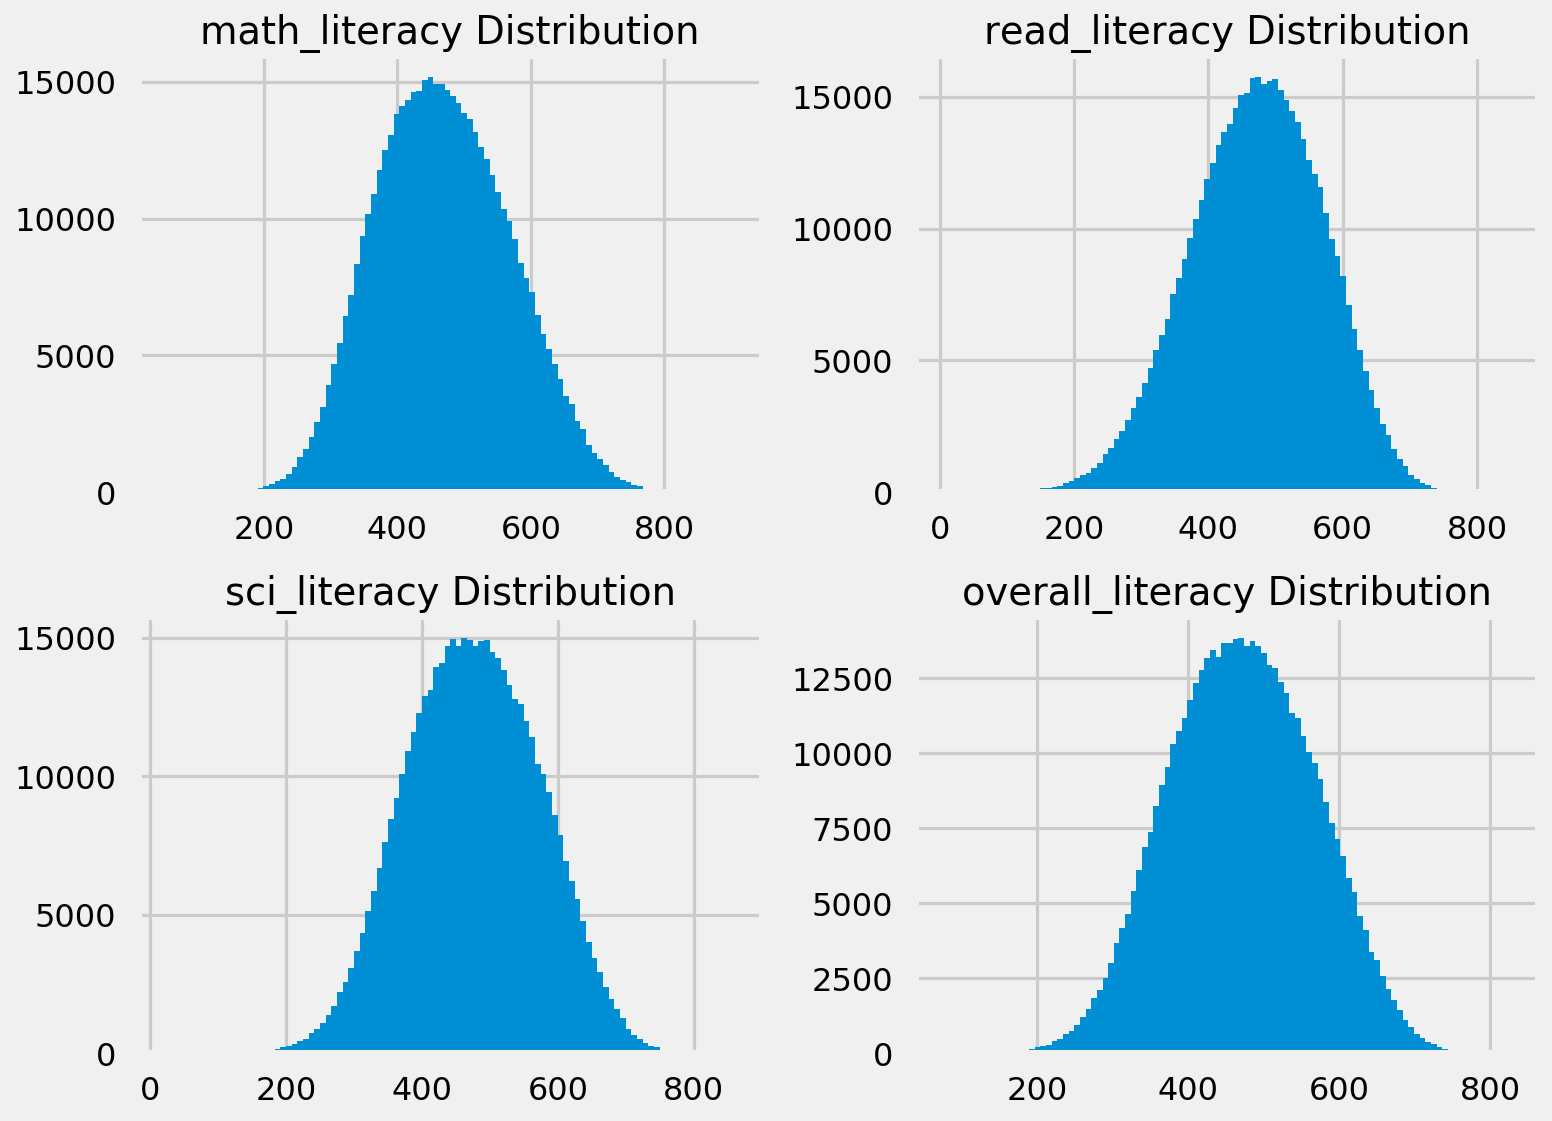

In [30]:
# Function for plotting multiple histograms from here:
# https://stackoverflow.com/questions/29530355/plotting- \
# multiple-histograms-in-grid
def draw_histograms(df, variables, n_rows, n_cols):
    fig = plt.figure()
    for i, var_name in enumerate(variables):
        ax = fig.add_subplot(n_rows, n_cols, i + 1)
        df[var_name].hist(bins=100, ax=ax)
        ax.set_title(var_name + " Distribution")
    fig.set_size_inches(11, 8)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()


draw_histograms(df_clean, 
                ['math_literacy', 
                 'read_literacy', 
                 'sci_literacy',
                 'overall_literacy'], 
                2, 2)


As expected and described in the PISA literature, each of these scores follows a standard distribution and are centered at approximately 500.

## Bivariate Exploration

First let's look at a correlation plot for each of the numeric variables in our dataframe.

In [31]:
numeric_vars = [
    'ESCS', 'overall_literacy', 'math_literacy', 'read_literacy',
    'sci_literacy', 'civil_liberties'
]


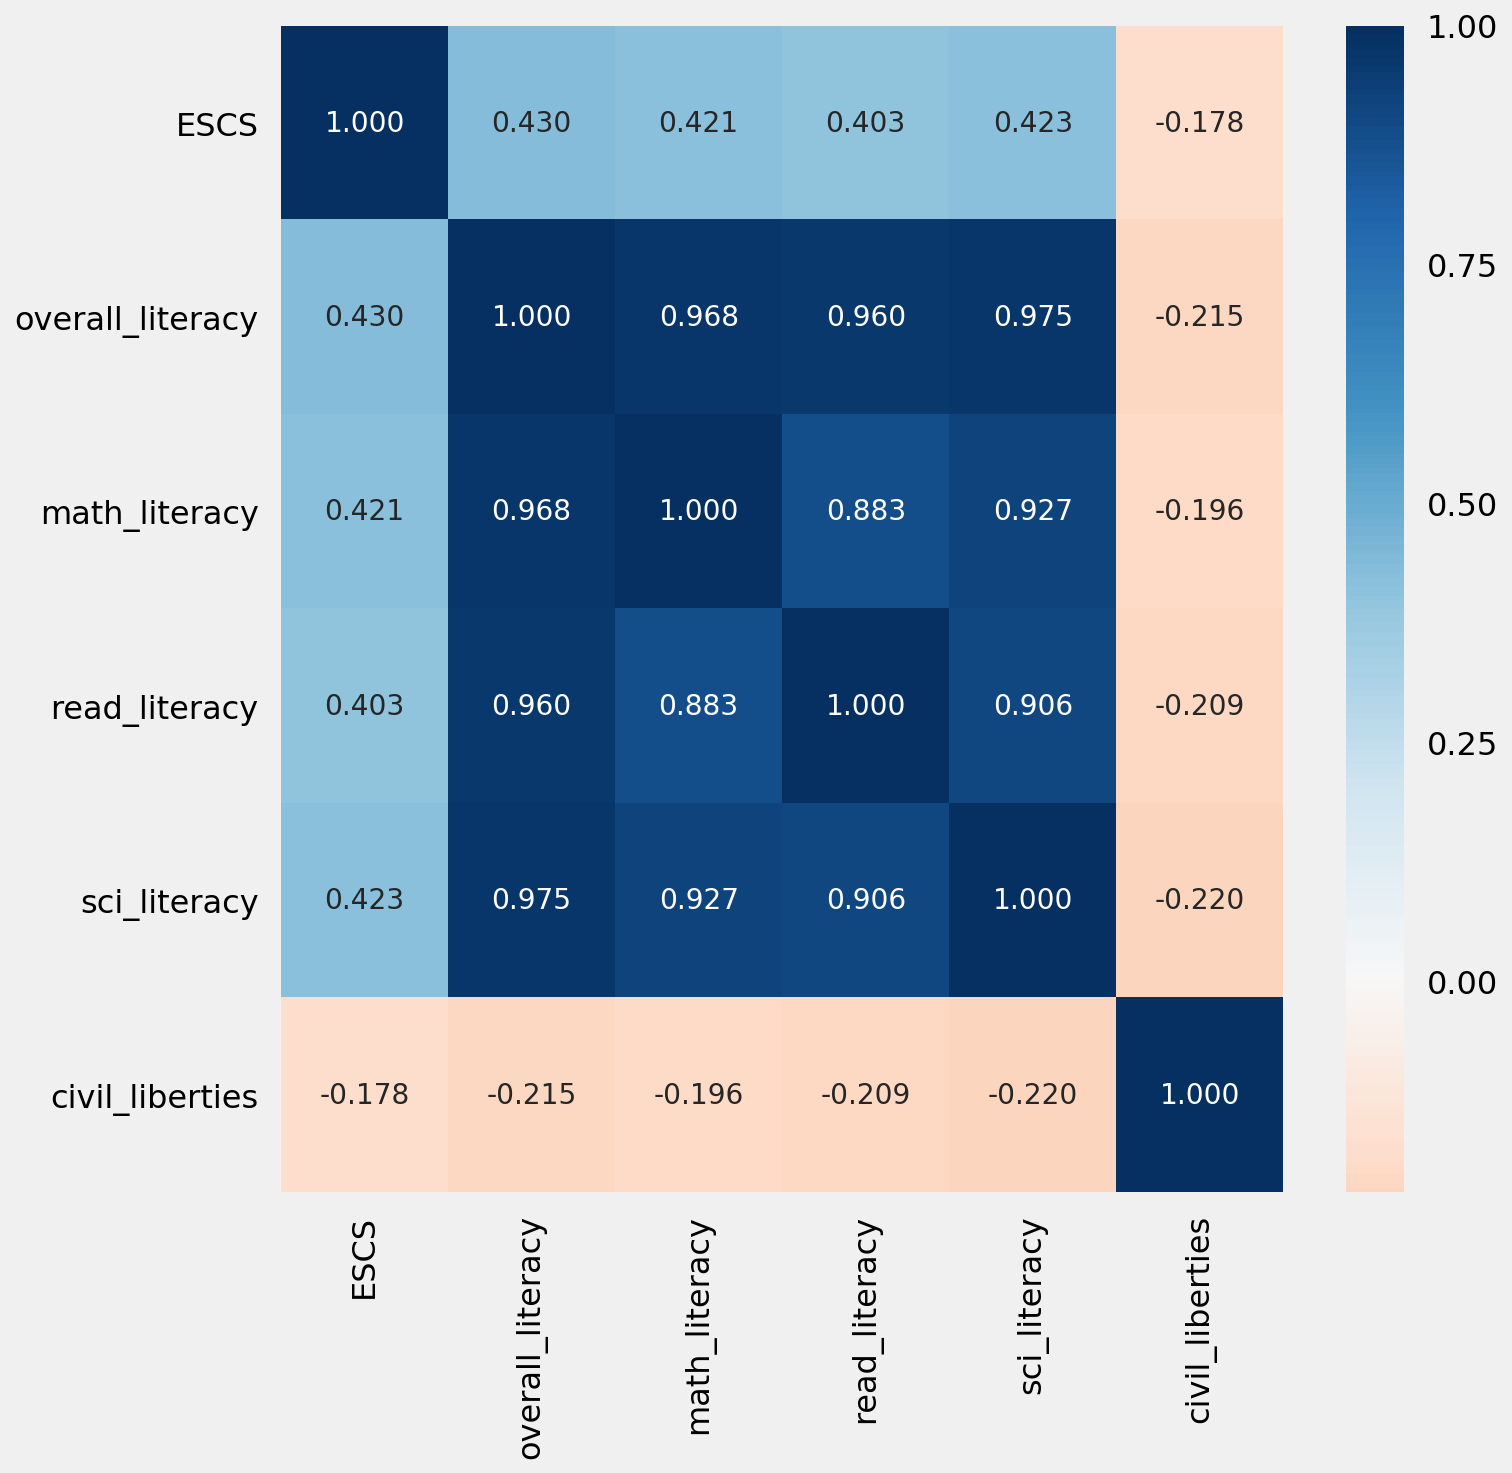

In [32]:
# correlation plot
plt.figure(figsize=[10, 10])
sns.heatmap(df_clean[numeric_vars].corr(),
           annot=True,
           fmt='.3f',
           cmap='RdBu',
           center=0)
plt.show()


We can see that there is quite a bit of correlation between the math, reading, and science literacy scores. (Of course each of these are also highly correlated with the overall literacy score, which is derived from them.) ESCS has medium correlation with the academic scores. Civil liberties appears to be weakly negatively correlated with the academic scores (in other words, as countries become less free - higher scores - literacy scores decline). We don't yet know whether that is statistically significant, we'll determine that later.

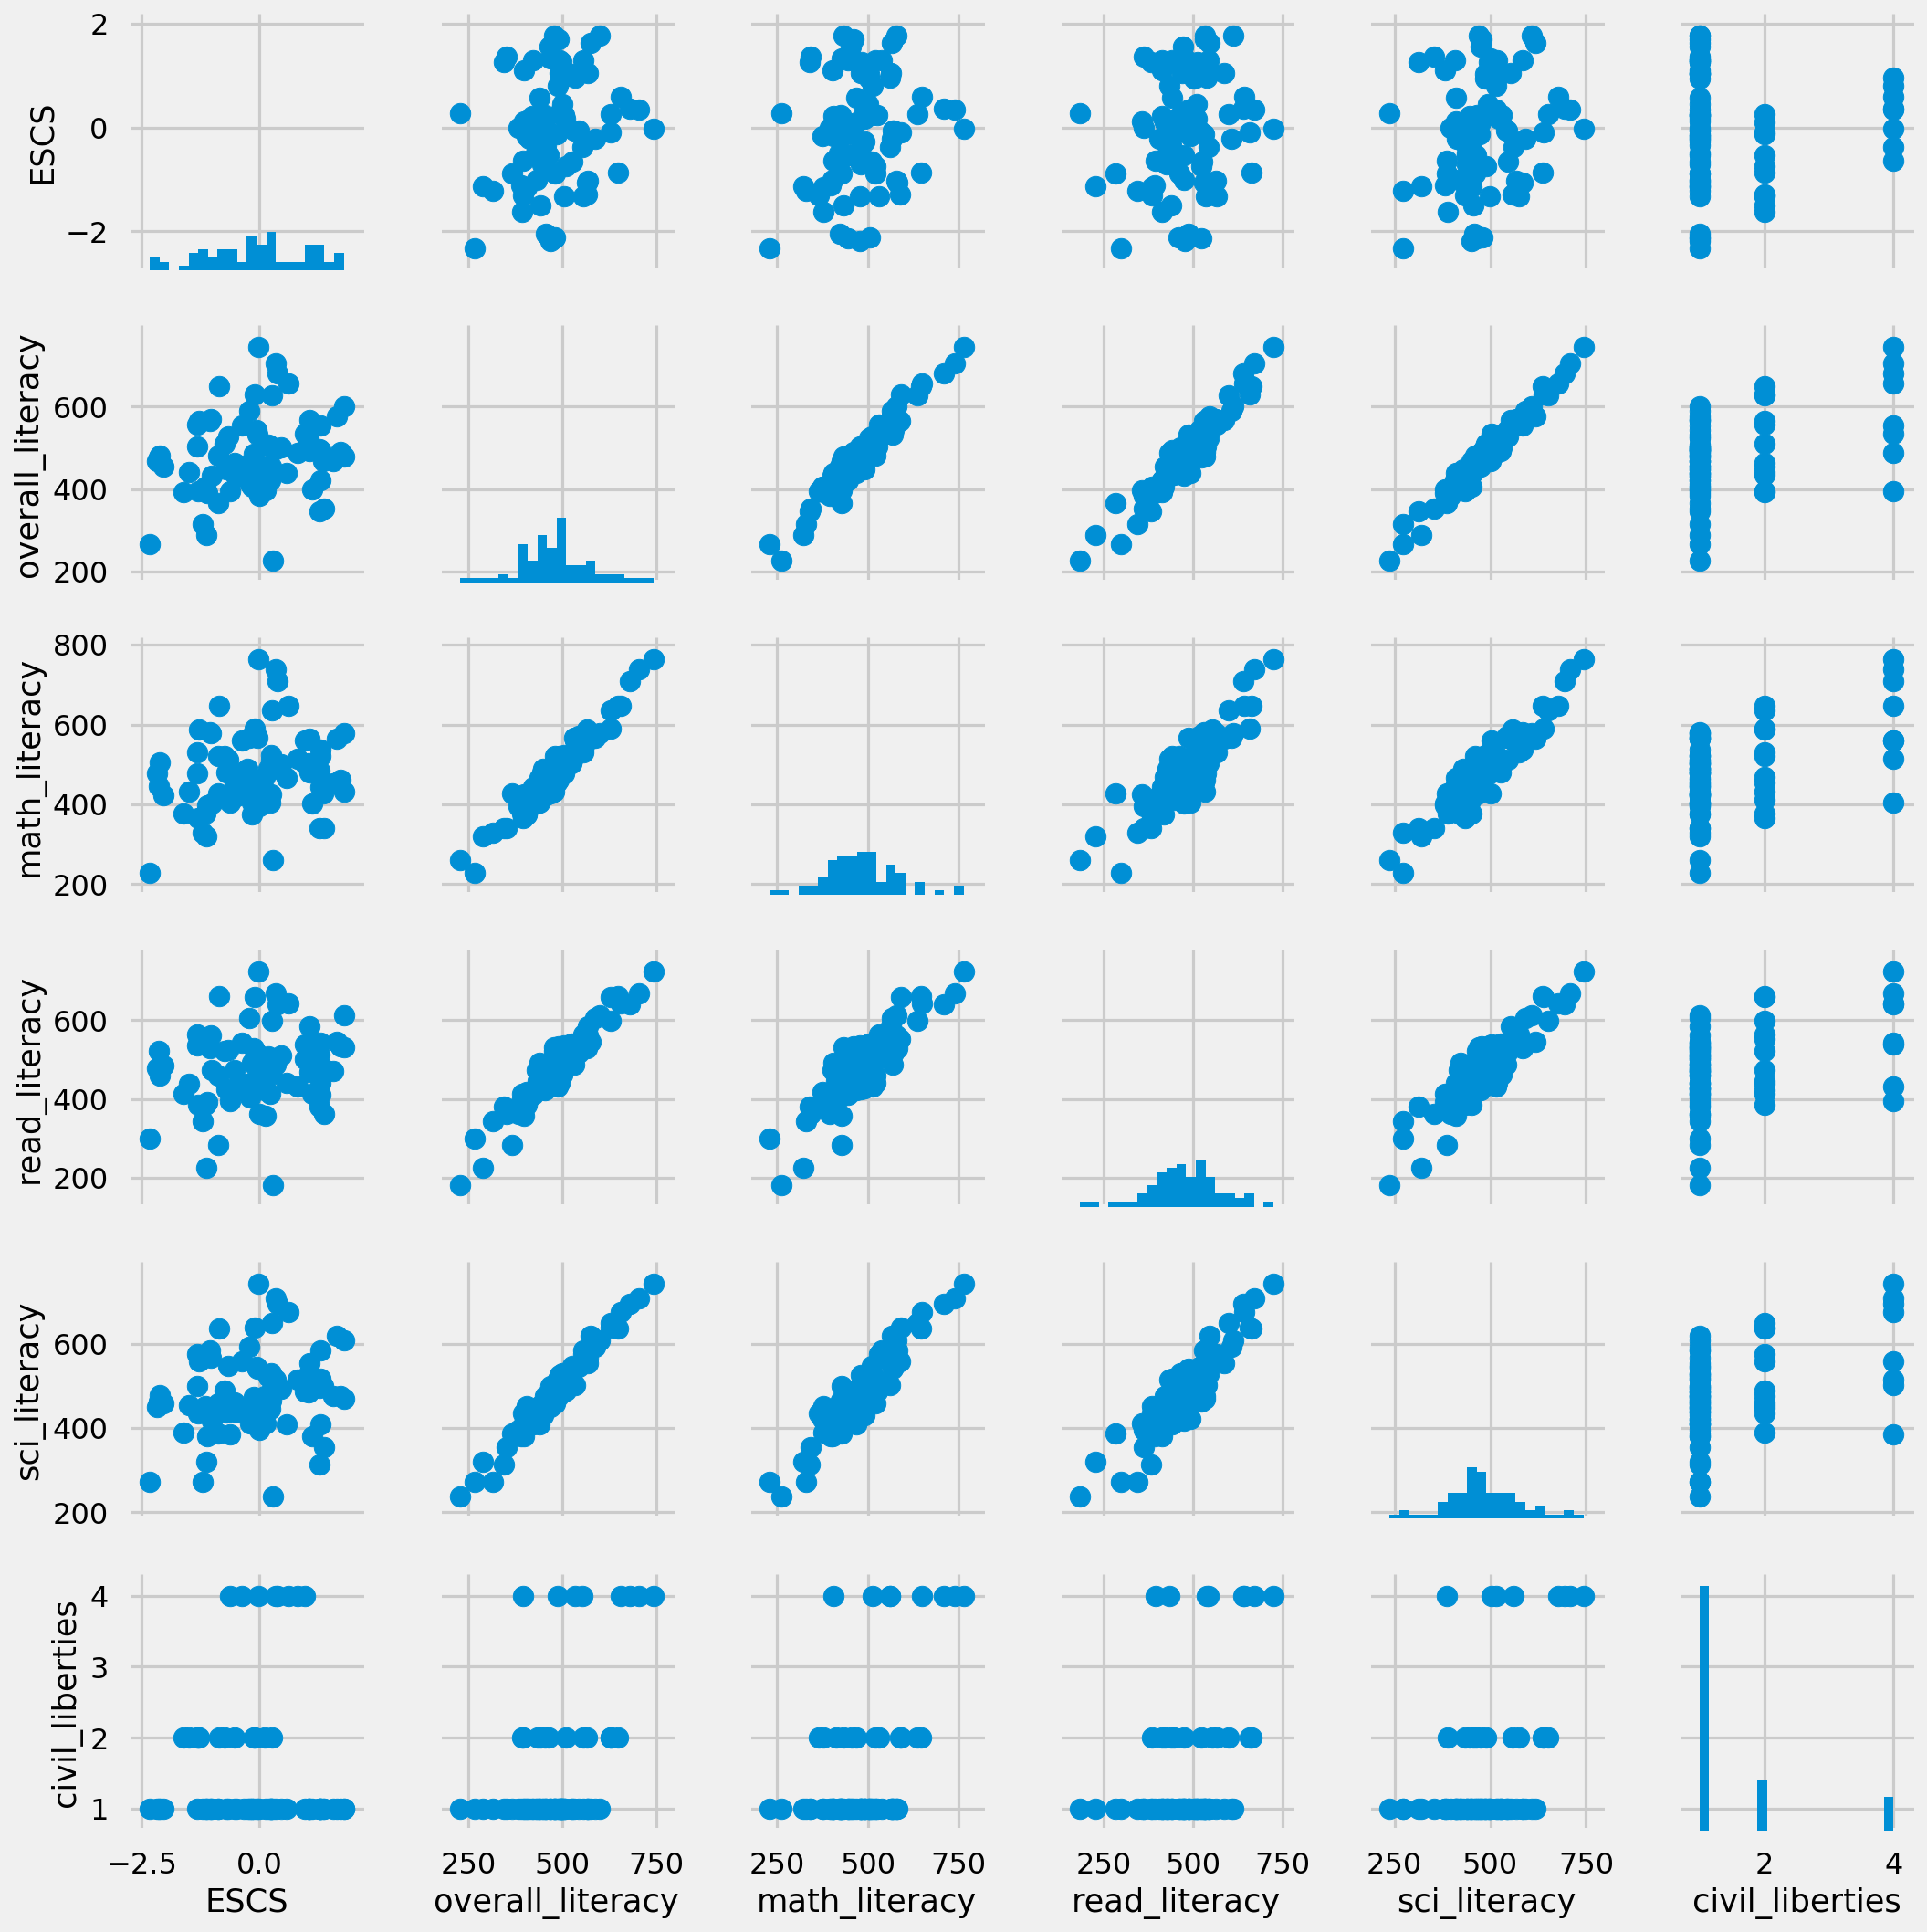

In [33]:
# plot matrix: sample 1000 rows so that plots are clearer and
# they render faster
samples = np.random.choice(df_clean.shape[0], 1000, replace=False)
df_samp = df_clean.loc[samples, :]

g = sns.PairGrid(data=df_samp.dropna(), vars=numeric_vars)
g = g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter)
plt.show()


### Relationship between Overall Literacy and Civil Liberties

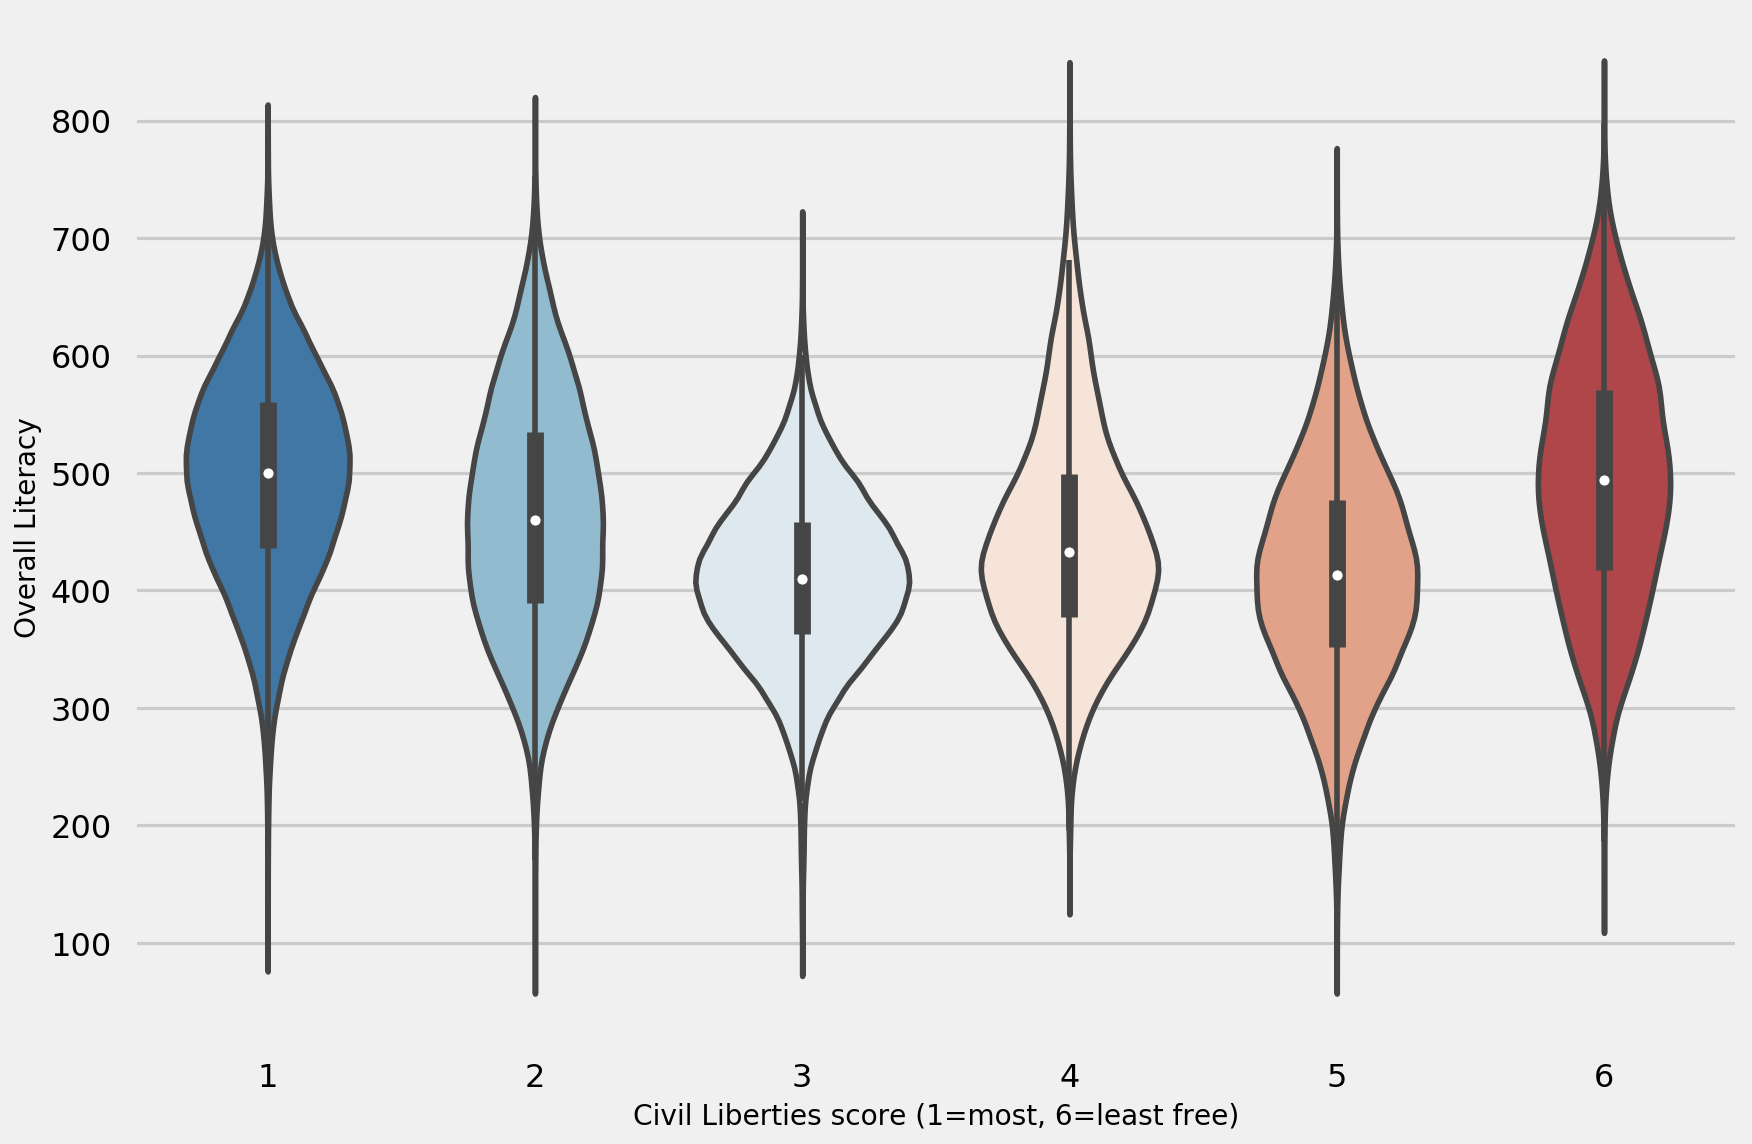

In [34]:
fig, ax = plt.subplots()
sns.violinplot(data=df_clean,
            x='civil_liberties',
            y='overall_literacy',
            palette='RdBu_r')
ax.set_ylabel("Overall Literacy", fontsize=14)
ax.set_xlabel("Civil Liberties score (1=most, 6=least free)", fontsize=14)
plt.show()
fig.savefig("images/overall-literacy-civil-liberties.png")

When we look at overall literacy by civil liberties category (1 = most free, 7 = least free) we can see that the most and least free countries seem to perform the best, with a slight decline from most to least free in the middle range (2-5). This is intriguing, and something we'll examine in more detail later.

### Relationship between Overall Literacy and Economic, Social, Cultural Opportunity

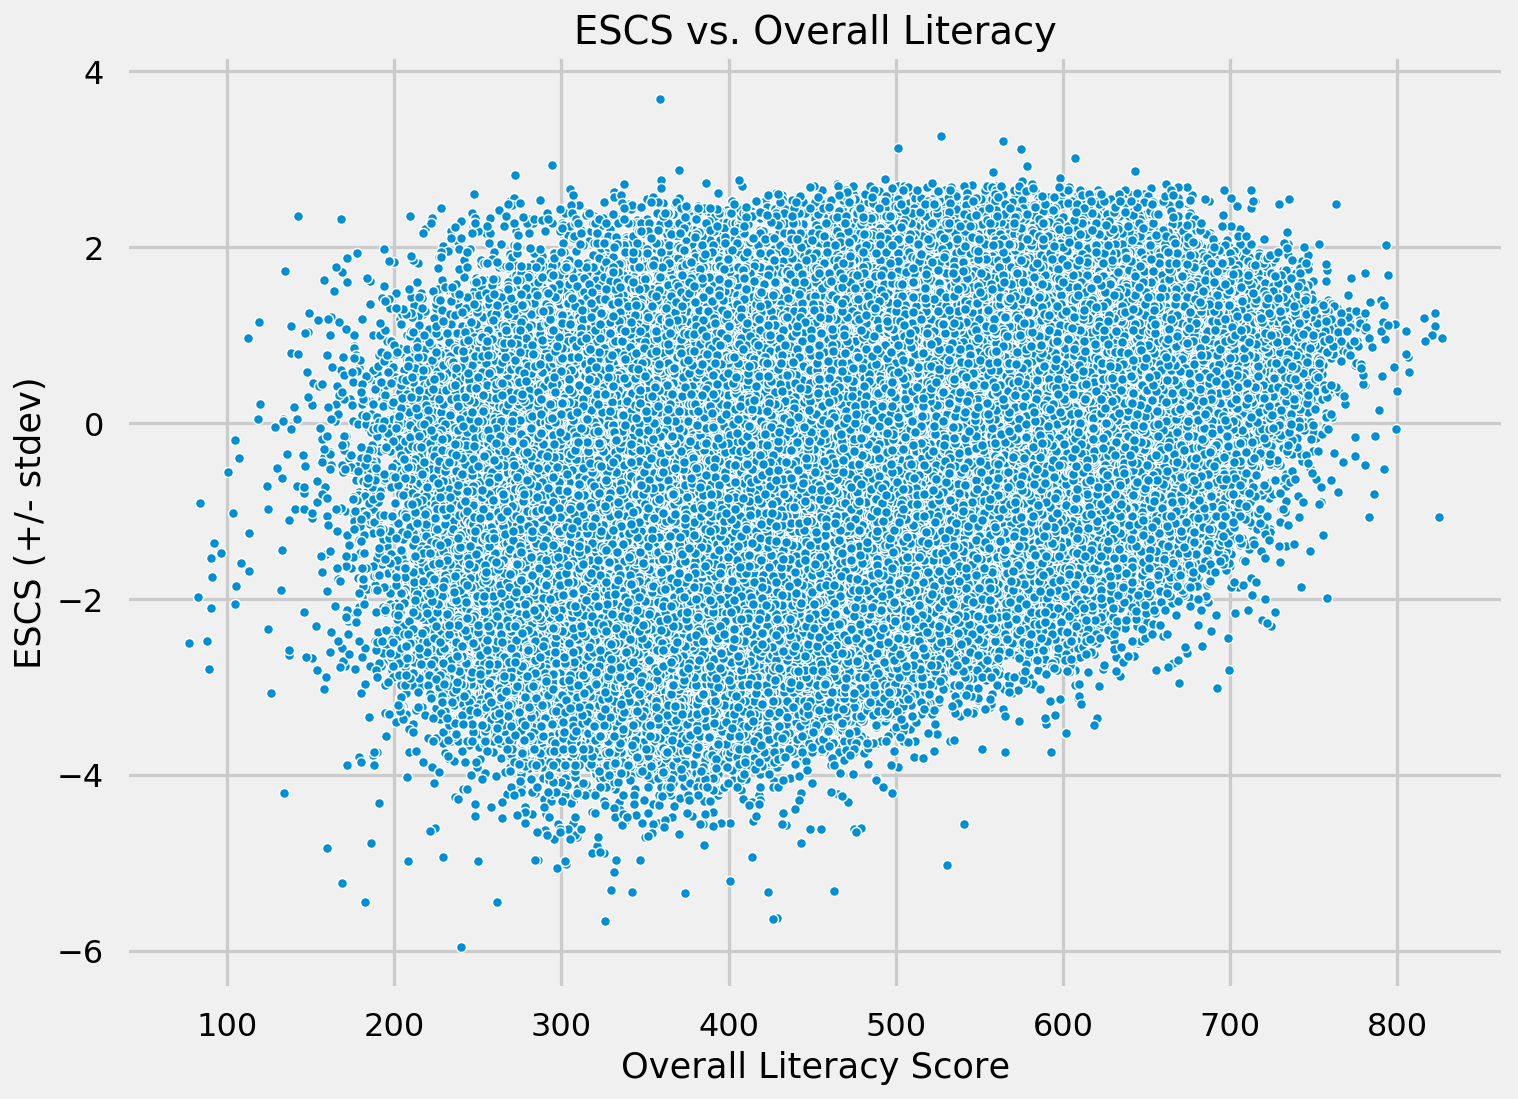

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
sns.scatterplot(data=df_clean,
                x='overall_literacy',
                y='ESCS',
                s=25,
                palette='RdBu_r')
plt.title("ESCS vs. Overall Literacy")
plt.ylabel("ESCS (+/- stdev)")
plt.xlabel("Overall Literacy Score")
plt.show()

When we plot overall literacy scores against ESCS we can see some correlation. We can measure that:

In [36]:
df_clean['ESCS'].corr(df_clean['overall_literacy'])

0.42956613577759306

ESCS has a medium positive correlation with overall literacy.

In [37]:
df_clean['ESCS'].corr(df_clean['civil_liberties'])

-0.1783027020940104

ESCS has a weak negative correlation to civil liberties (meaning less free countries tend to have lower ESCS).

### Relationship between Reading Literacy and Age Started Learning

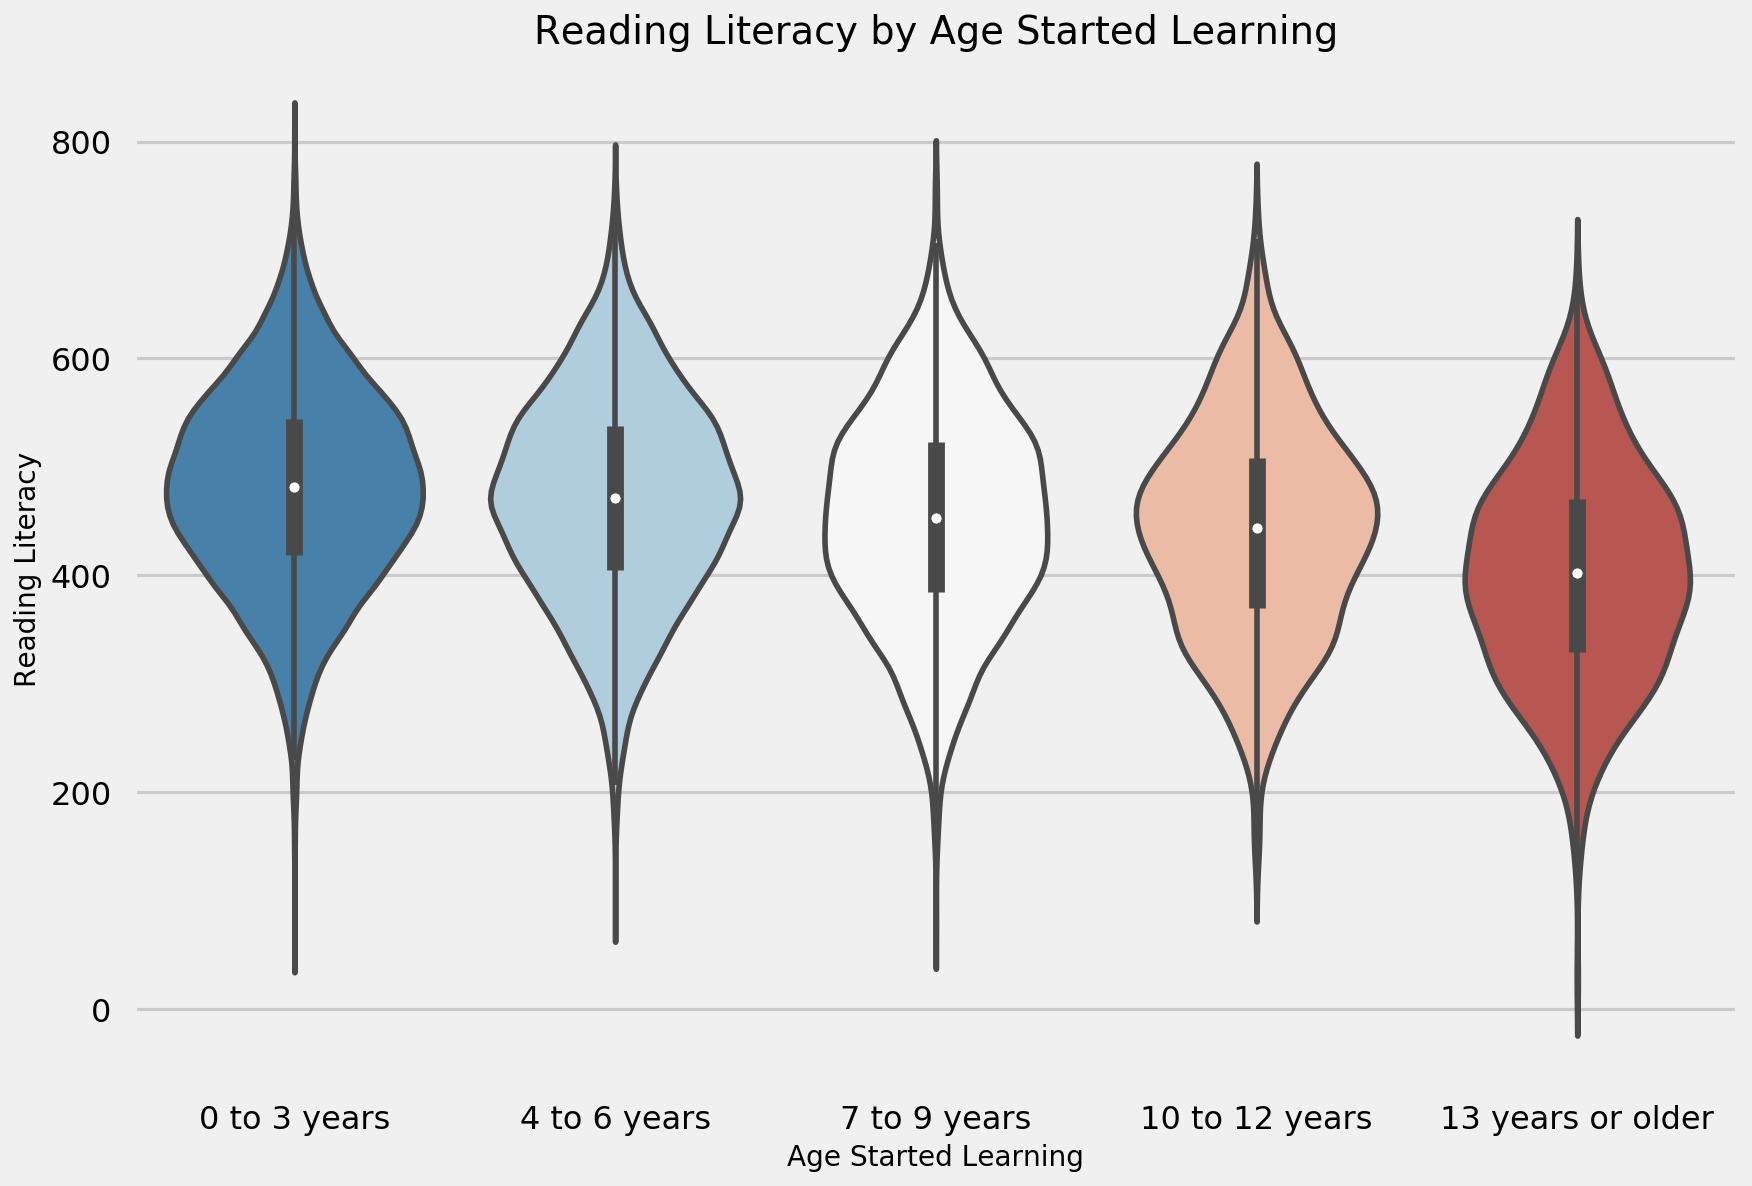

In [38]:
fig, ax = plt.subplots()
sns.violinplot(data=df_clean,
               x='age_start_learn',
               y='read_literacy',
               palette='RdBu_r')
ax.set_ylabel("Reading Literacy", fontsize=14)
ax.set_xlabel("Age Started Learning", fontsize=14)
ax.set_title("Reading Literacy by Age Started Learning")
plt.show()
fig.savefig("images/read-literacy-age-started-learning.png")

From a visual inspection, it appears that reading literacy declines the longer a student goes before starting to learn. We might expect that since students were age 15 when they took the exam. Students in the 13 years and older category would have been studying the test language for no more than 2 years.

Below I'll perform some regression analysis to determine if this decline is statistically significant.

### Relationship between Disadvantage/Advantage and Overall Literacy

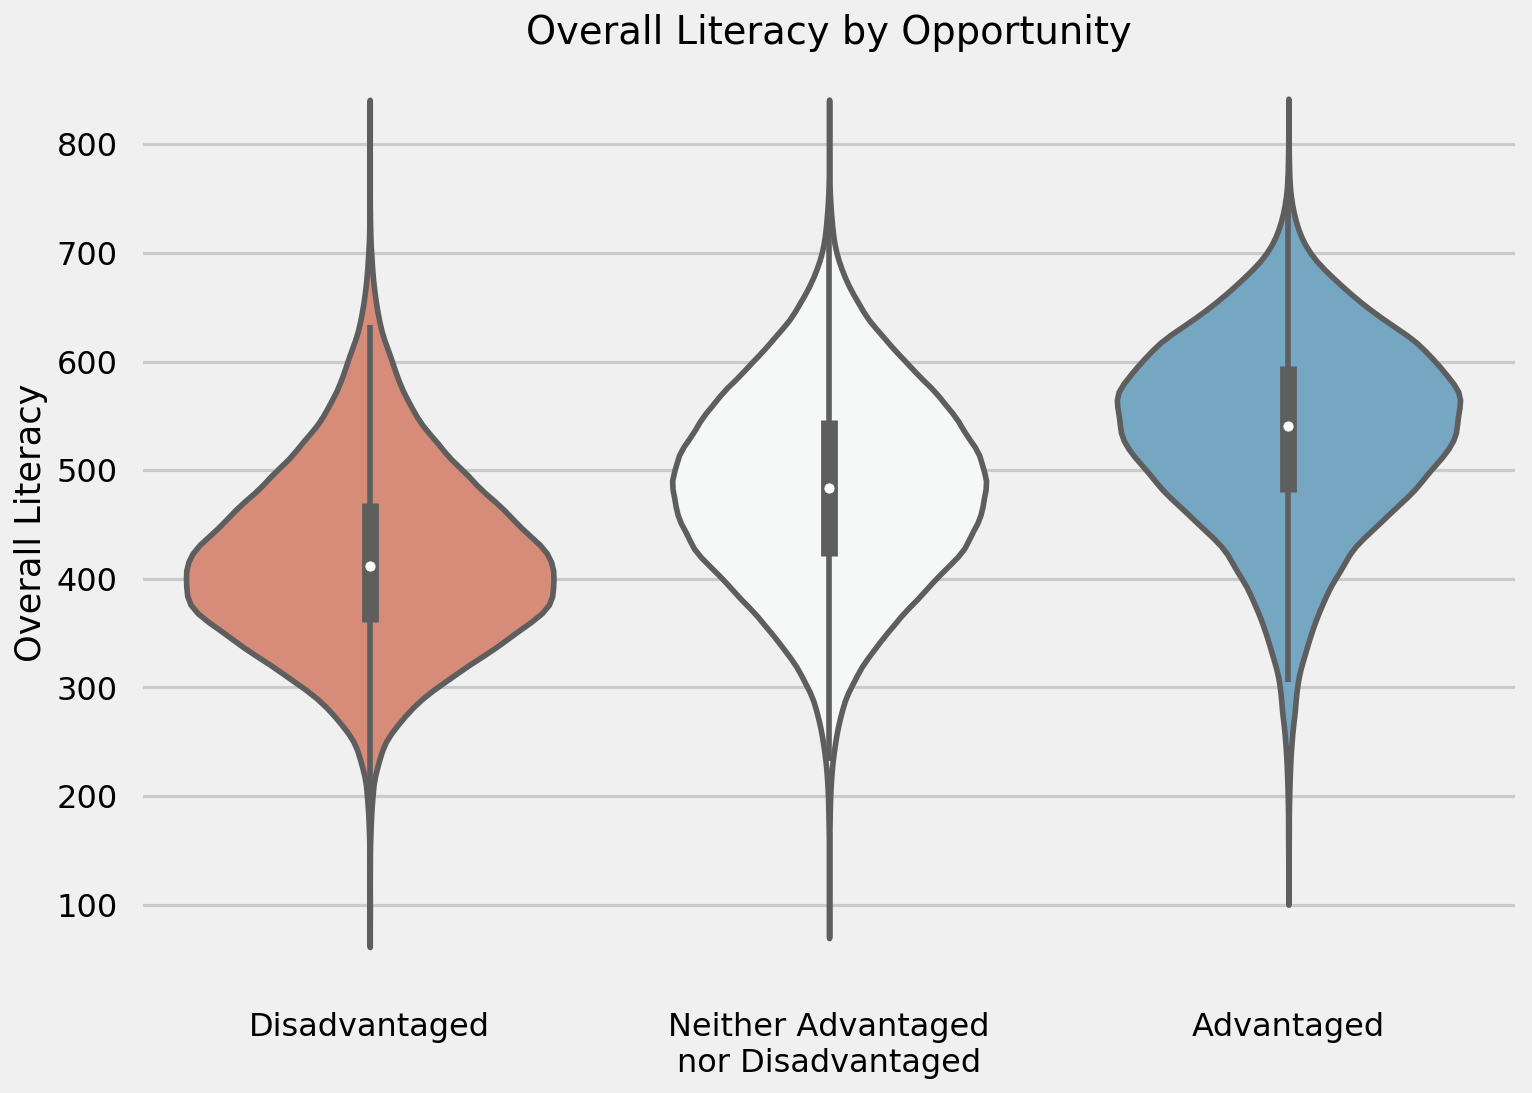

In [39]:
df1 = pd.DataFrame(df_clean.query('disadvantaged == 1'),
                   columns=['overall_literacy']).assign(opp='Disadvantaged')
df2 = pd.DataFrame(df_clean.query('advantaged == 0 and disadvantaged == 0'),
                   columns=['overall_literacy'
                           ]).assign(opp='Neither Advantaged\nnor Disadvantaged')
df3 = pd.DataFrame(df_clean.query('advantaged == 1'),
                   columns=['overall_literacy']).assign(opp='Advantaged')

cdf = pd.concat([df1, df2, df3])

mdf = pd.melt(cdf, id_vars=['opp'], var_name=['overall_literacy'])

fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
ax = sns.violinplot(x='opp', y='value', data=mdf, palette='RdBu')
ax.set_xlabel(None)
ax.set_ylabel("Overall Literacy")
ax.set_title("Overall Literacy by Opportunity")
plt.show()
fig.savefig("images/overall-literacy-by-opportunity.png")

We can see the stark difference in overall academic literacy based on opportunity status. Disadvantaged students seem to have their scores weighted down, pulled below the median of 500. Advantaged students, on the other hand, appear to have their scores pulled up by a force from above. We'll look at whether this difference is statistically significant.

## Multivariate Exploration

### Relationship between Gender, Age Started Learning Language, and Reading Literacy

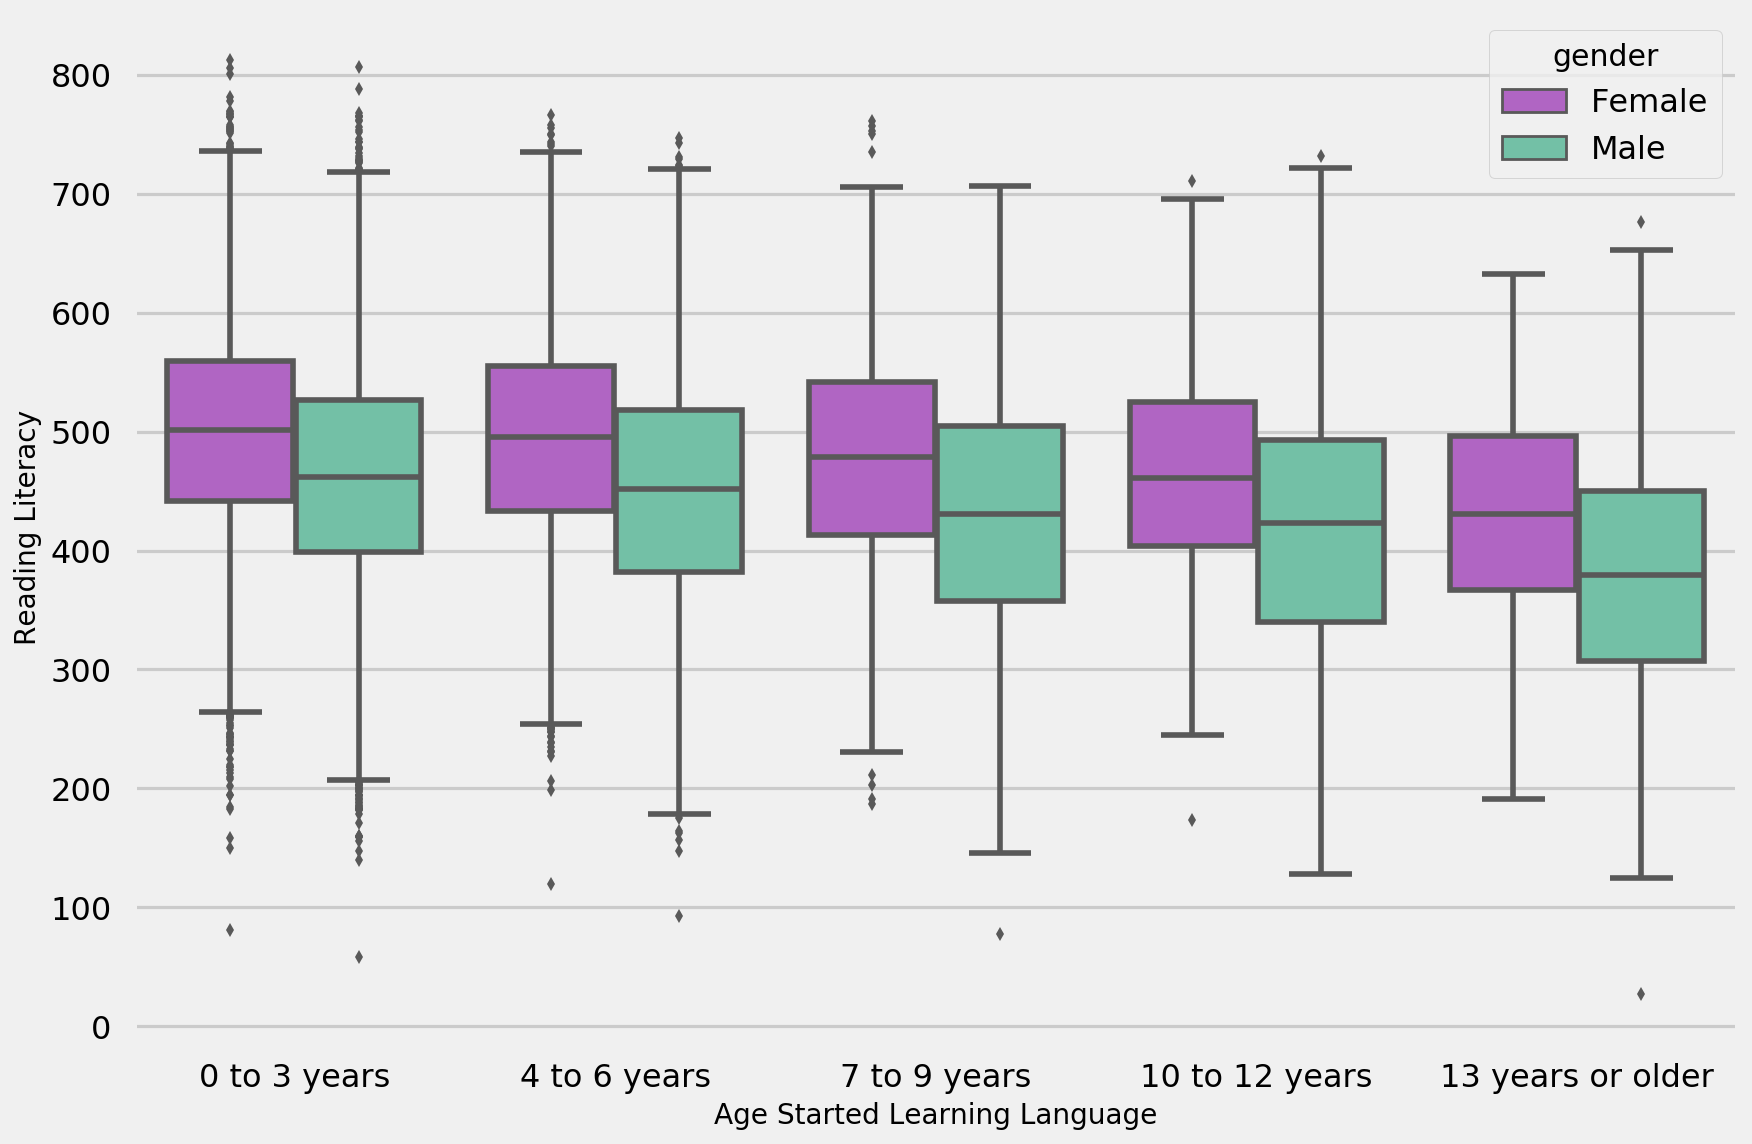

In [40]:
fig, ax = plt.subplots()
sns.boxplot(data=df_clean,
            x='age_start_learn',
            y='read_literacy',
            palette=['mediumorchid', 'mediumaquamarine'],
            hue='gender')
ax.set_ylabel("Reading Literacy", fontsize=14)
ax.set_xlabel("Age Started Learning Language", fontsize=14)
plt.show()
fig.savefig("images/read-literacy-gender-age-started-learning.png")

Here we observe again that reading performance appears to decline the later a student learned the test language. Keep in mind that the test subjects were 15-year-olds, meaning that students who only started learning the test language at 13 years or older had fewer than two years of familiarity with the language at test time.

Male students appear to perform worse overall than female students, and the performance gap between female and male students seems to increase the later students first began learning the language.

### Relationship between ESCS, Age Started Learning, and Reading Literacy

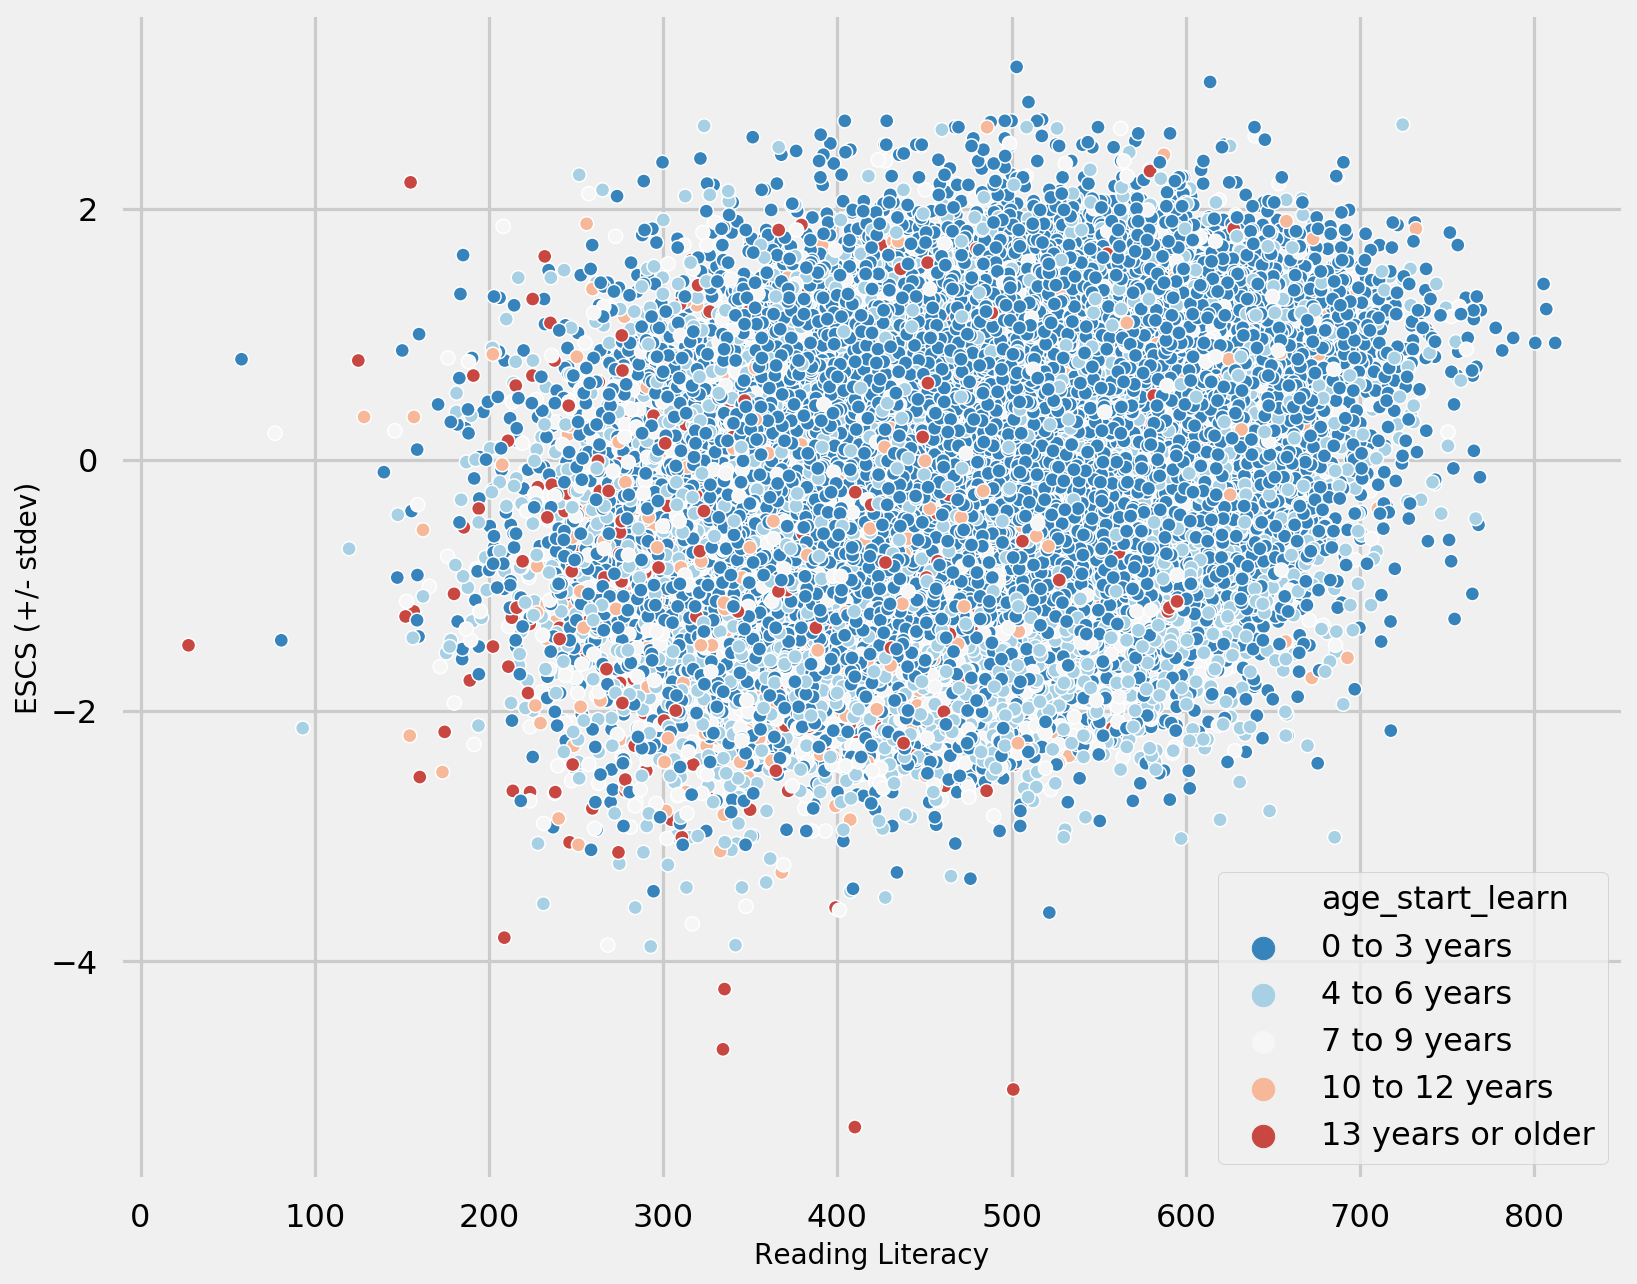

In [41]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
sns.scatterplot(data=df_clean.dropna(),
                x='read_literacy',
                y='ESCS',
                palette="RdBu_r",
                hue='age_start_learn',
                s=50)
ax.set_xlabel("Reading Literacy", fontsize=14)
ax.set_ylabel("ESCS (+/- stdev)", fontsize=14)
plt.show()


We can revist our ESCS vs. literacy plot, but this time looking only at reading literacy overlaid with the age student began learning the language. We can see several points for 13 years or older in the lower-left of our plot, both performing poorly on the literacy and below the mean ESCS (disadvantaged).

### Relationship between Country, Overall Literacy, and Civil Liberties

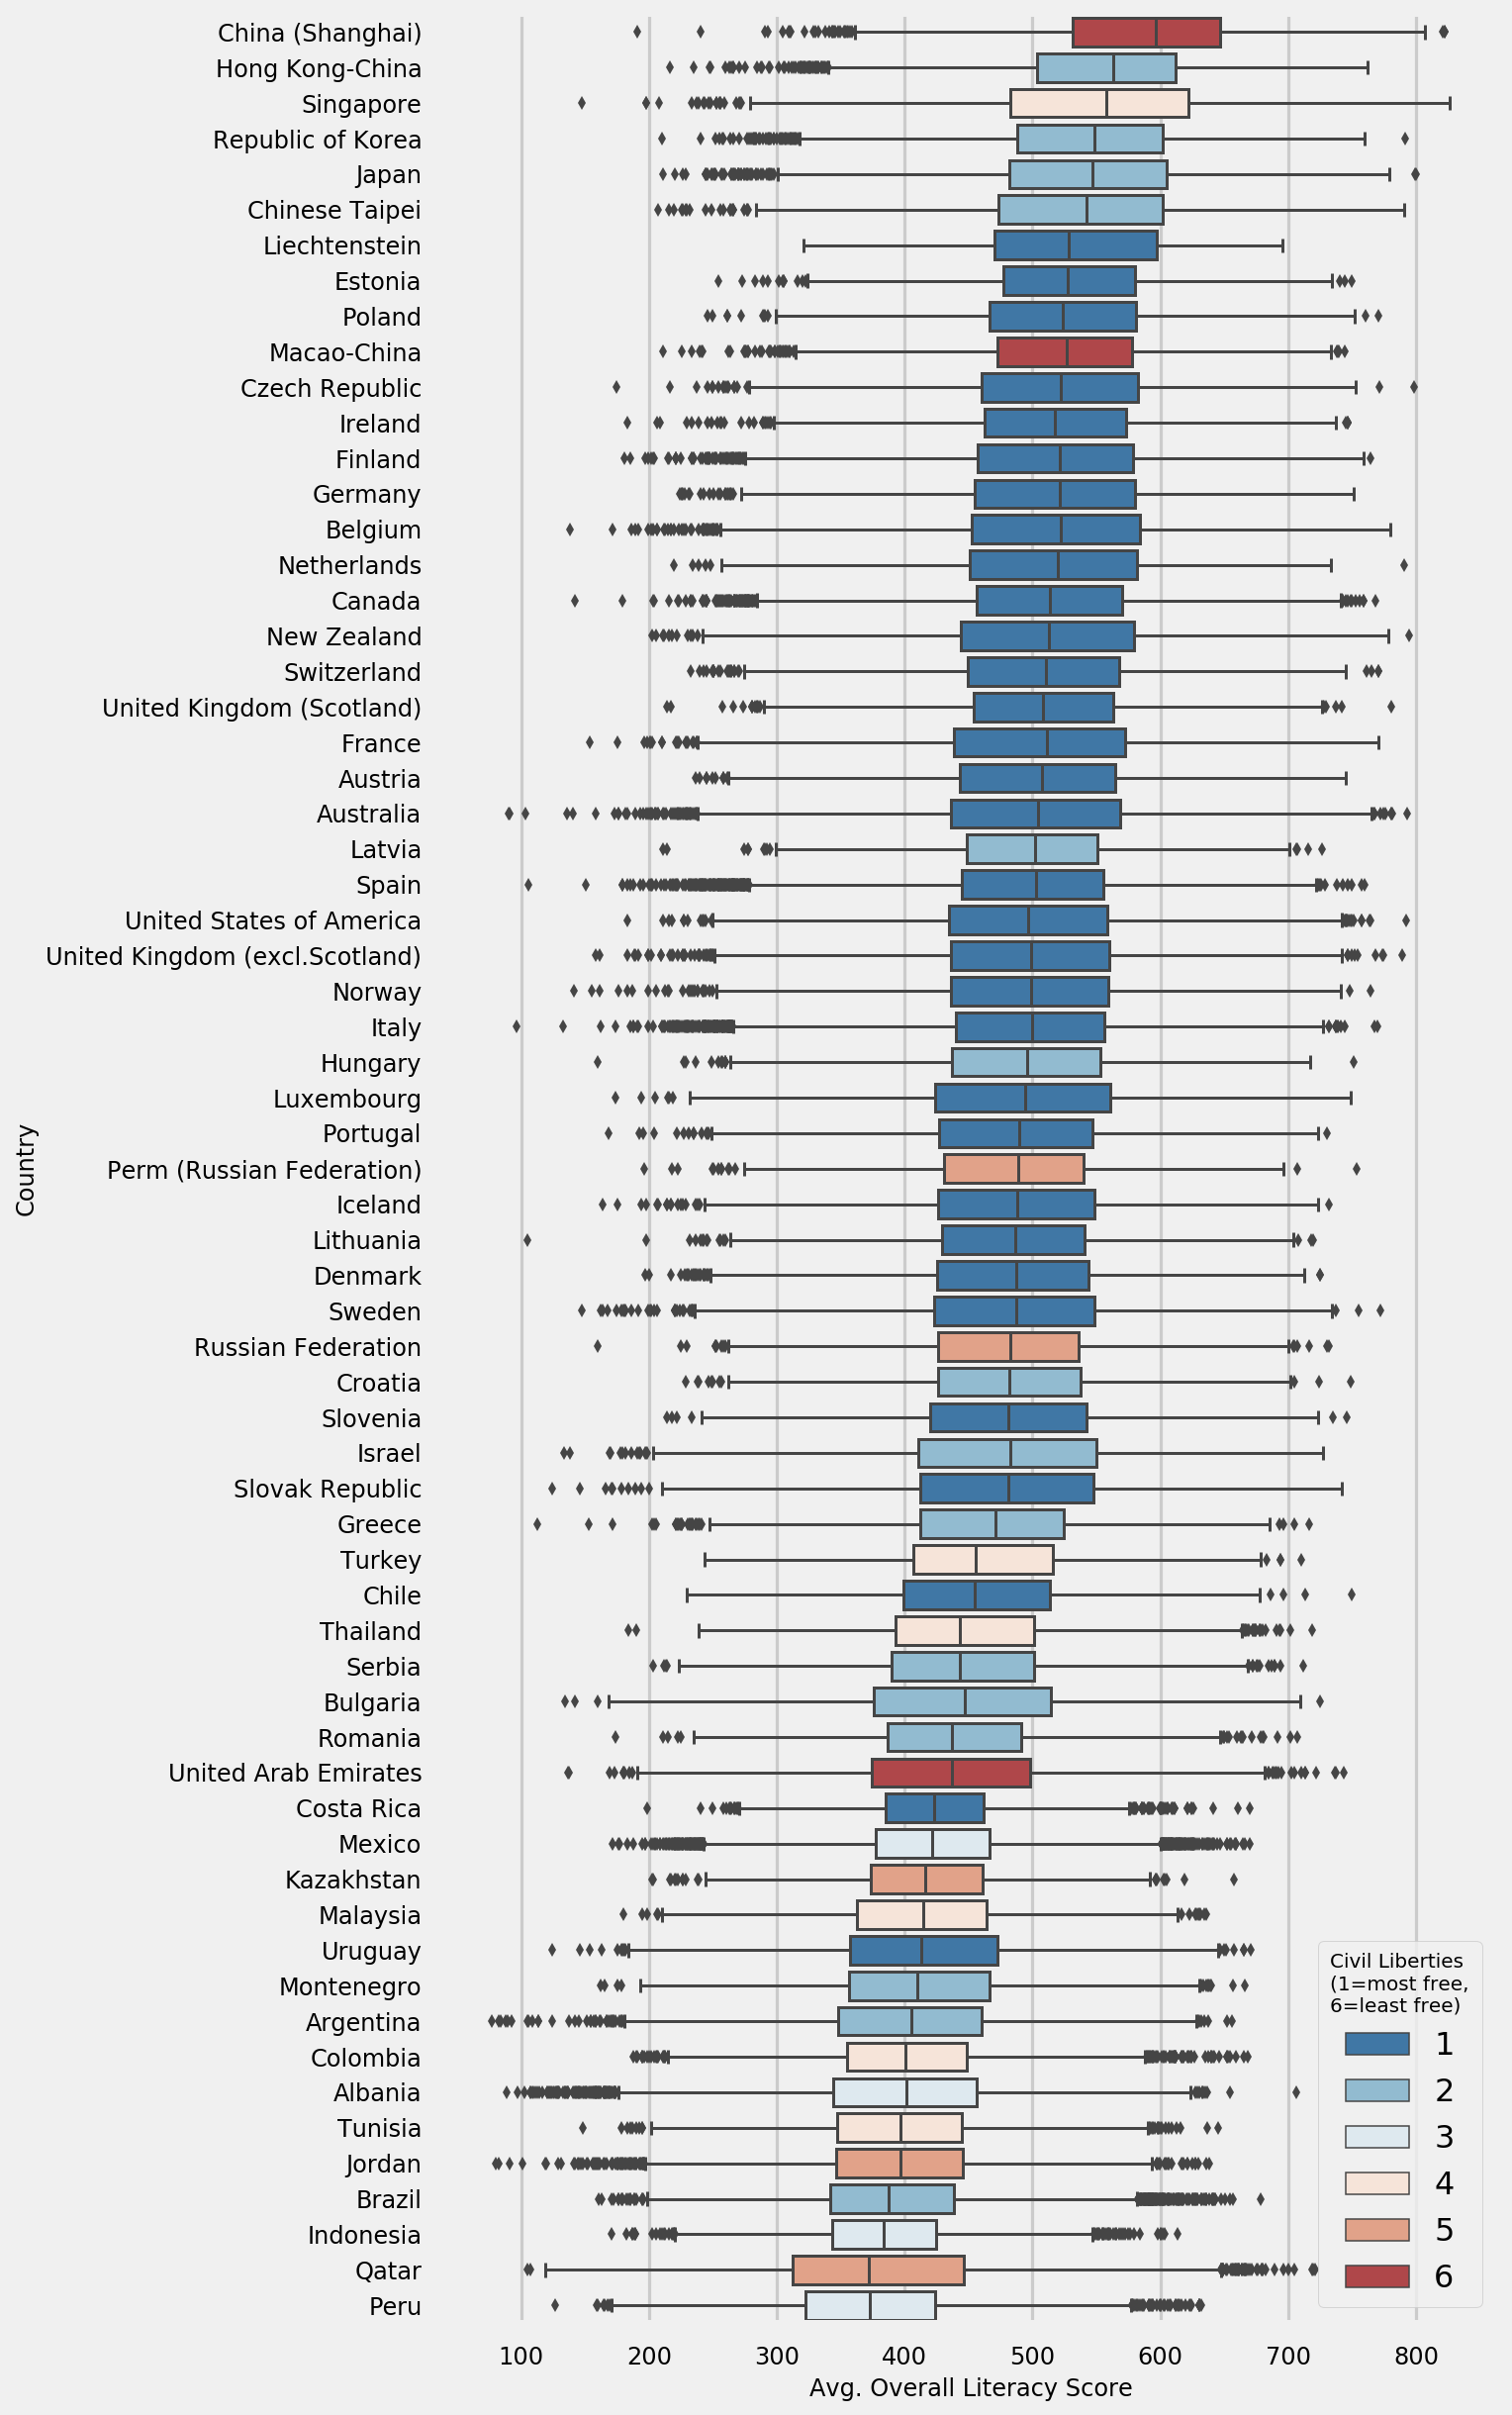

In [42]:
cnt_sort = df_clean.groupby('country')['overall_literacy'].mean().sort_values(
    ascending=False)

fig, ax = plt.subplots()
fig.set_size_inches(8.5, 20)
sns.boxplot(data=df_clean,
            y='country',
            x='overall_literacy',
            order=cnt_sort.index.get_level_values('country'),
            dodge=False,
            palette='RdBu_r',
            hue='civil_liberties',
            width=0.8,
            linewidth=1.5)
ax.set_ylabel("Country", fontsize=12)
ax.set_xlabel("Avg. Overall Literacy Score", fontsize=12)
legend = ax.legend(loc='best', title_fontsize=10).set_title(
    'Civil Liberties\n(1=most free,\n6=least free)')
ax.tick_params(labelsize=12)
plt.show()
fig.savefig("images/overall-literacy-country.png")


### Relationship between Country, ESCS, and Civil Liberties

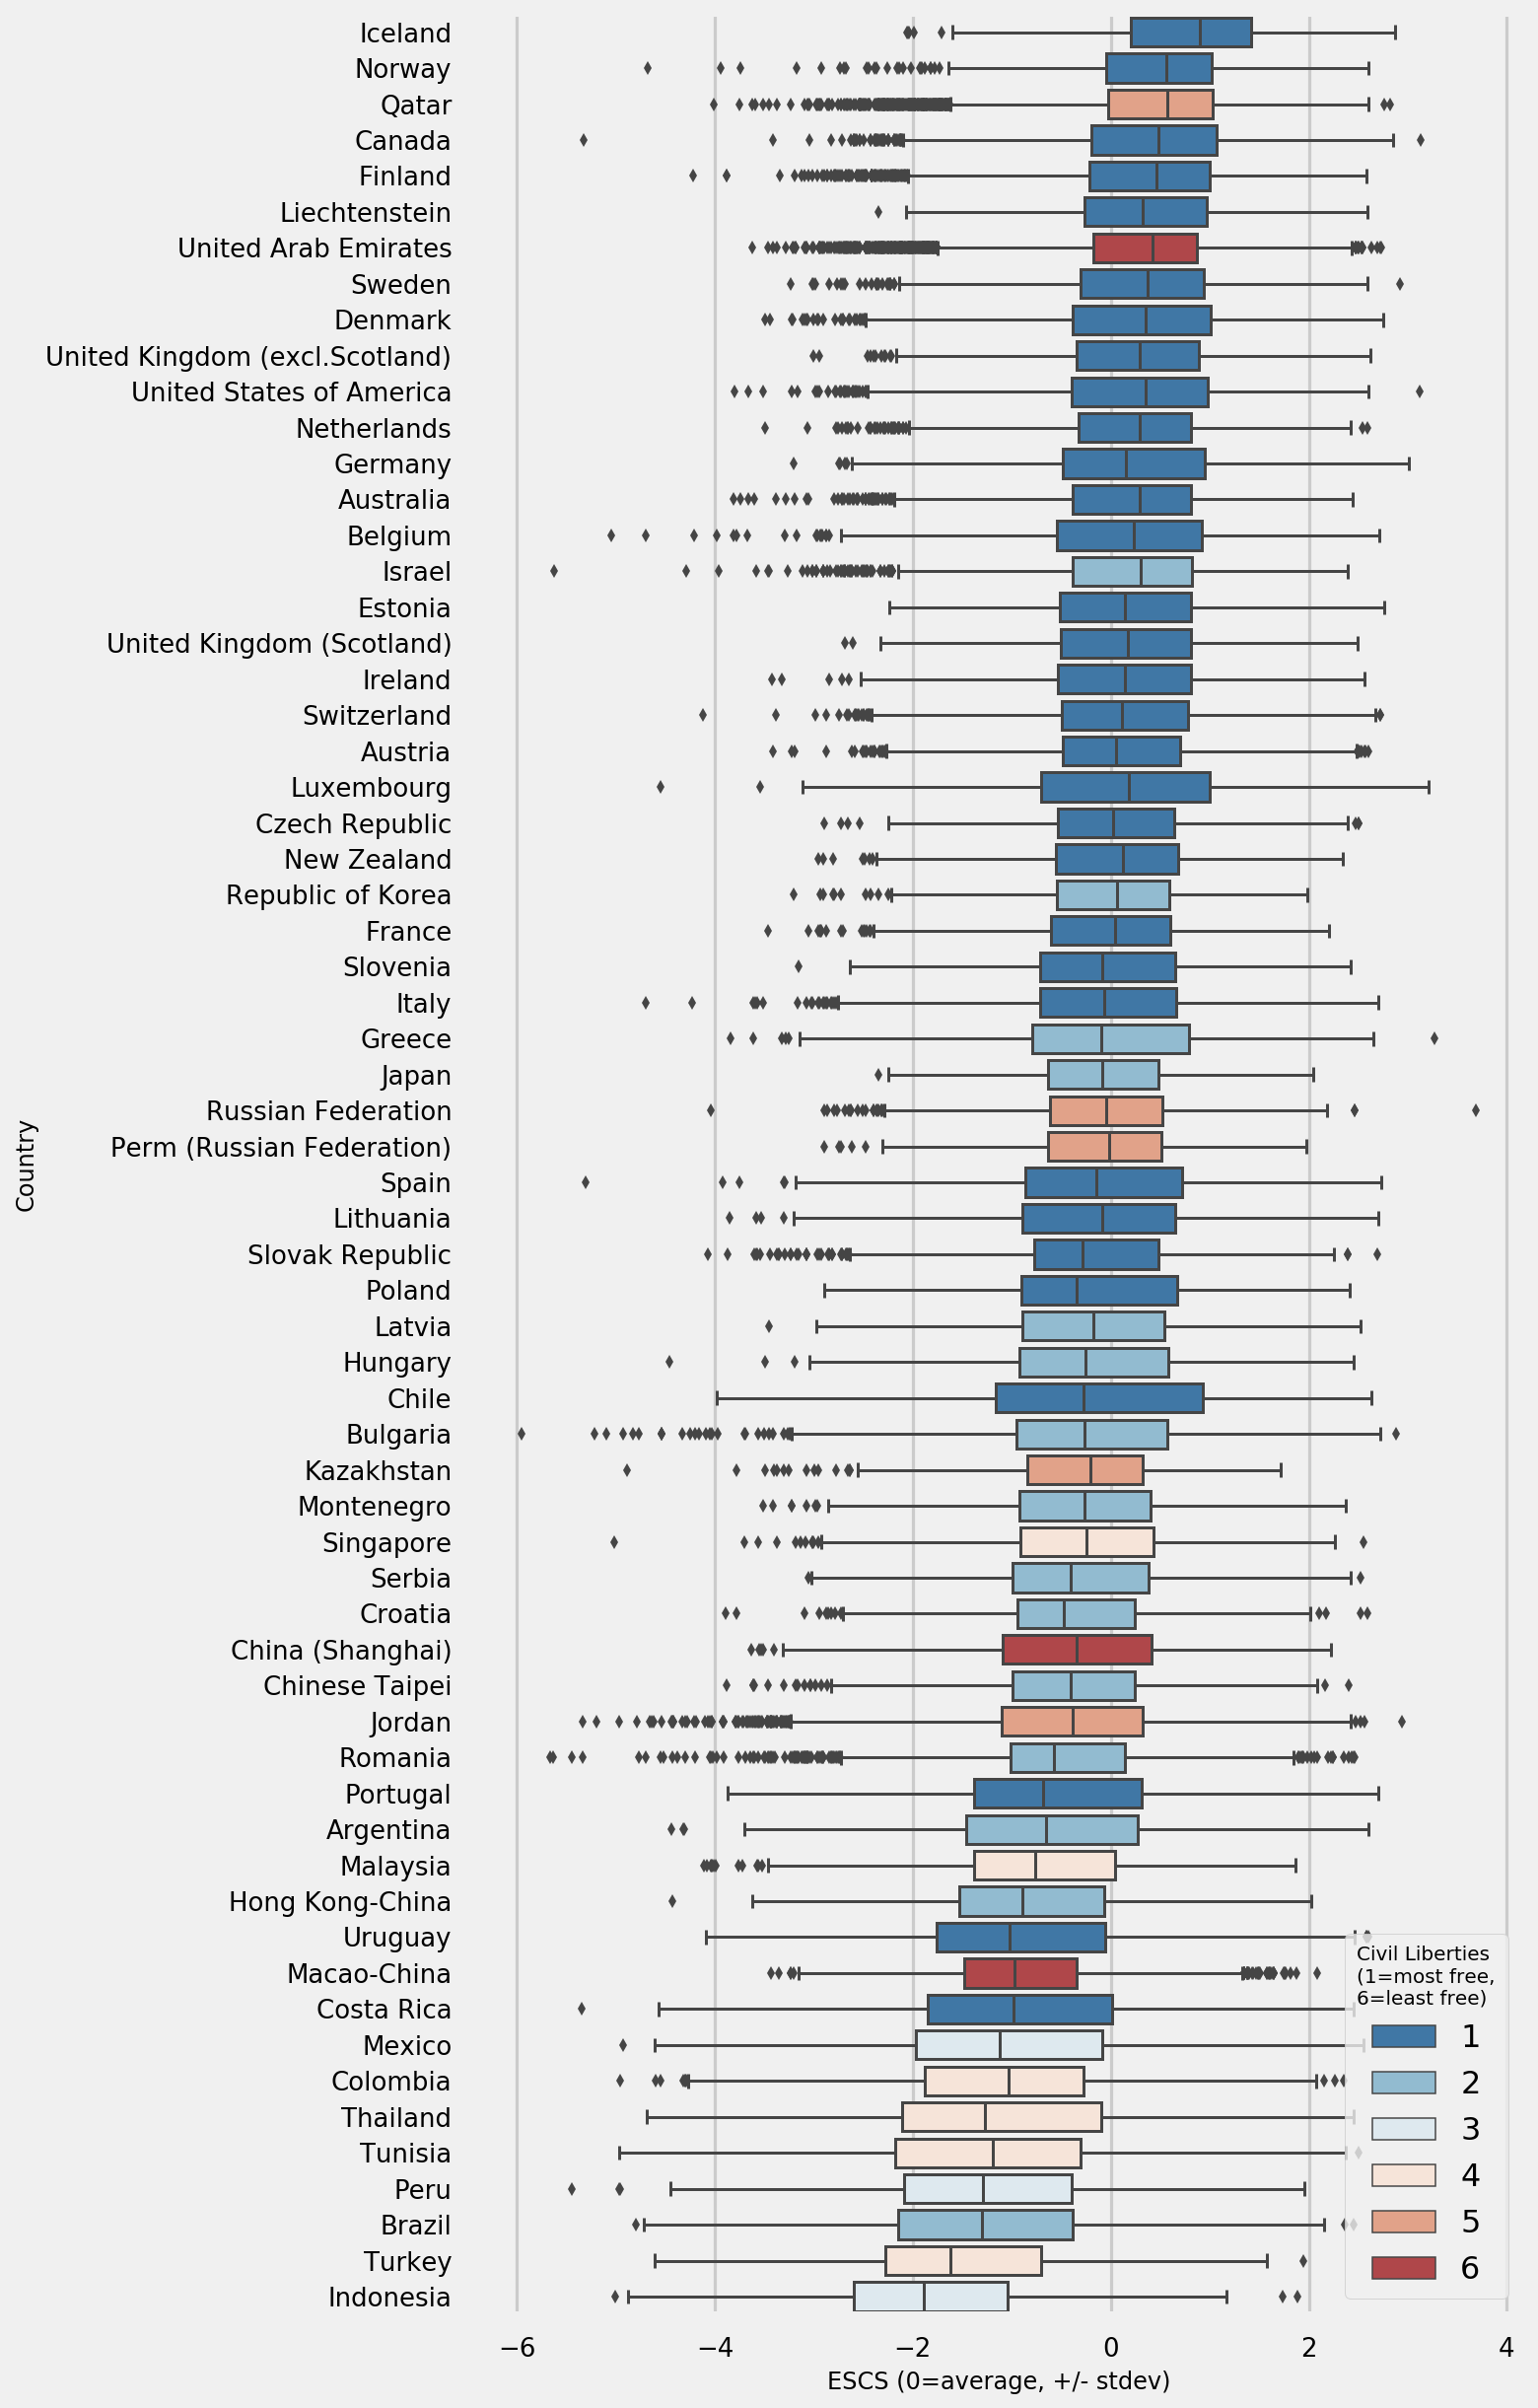

In [43]:
cnt_sort = df_clean.groupby('country')['ESCS'].mean().sort_values(
    ascending=False).dropna()

fig, ax = plt.subplots()
fig.set_size_inches(8.5, 20)
sns.boxplot(data=df_clean,
            y='country',
            x='ESCS',
            order=cnt_sort.index.get_level_values('country'),
            dodge=False,
            palette='RdBu_r',
            hue='civil_liberties',
            width=0.8,
            linewidth=1.5)
ax.set_ylabel("Country", fontsize=12)
ax.set_xlabel("ESCS (0=average, +/- stdev)", fontsize=12)
legend = ax.legend(loc='lower right', title_fontsize=10).set_title(
    'Civil Liberties\n(1=most free,\n6=least free)')
ax.tick_params(labelsize=13)
plt.show()
fig.savefig("images/escs-country.png")


ESCS seem to be missing for Albania. That made me suspicious that there was an error on my part, especially because Albania comes first alphabetically and their data were at the top of the imported CSV. However, when I investigated further I found that there was good reason for Albania data to be missing and this was intentional:

> "For example, the reliability of parental occupation data from Albania was subject to scrutiny, resulting in a recommendation that all data dependant on Albania’s parental occupation data (in particular, all data that use the PISA index of economic, social and cultural status \[ESCS\]) should be deleted from the database and relevant tables." (Source: _PISA 2012 Technical Report_, p. 280)

## Regression Analysis

In [44]:
df_new = df_clean.copy()

# Add an intercept column
df_new['intercept'] = 1

In [45]:
# Create one-hot encoded columns for Age Started Learning
df_new = df_new.join(pd.get_dummies(df_new['age_start_learn']))

# Create one-hot encoded columns for Gender
df_new = df_new.join(pd.get_dummies(df_new['gender']))

In [46]:
df_new.sample(5)

student_id         country  ESCS age_start_learn  gender  overall_literacy  math_literacy  read_literacy  sci_literacy  civil_liberties  disadvantaged  advantaged  intercept  0 to 3 years  4 to 6 years  7 to 9 years  10 to 12 years  13 years or older  Female  Male
451940        3610  Chinese Taipei  0.72             NaN  Female        599.764133      643.17652      602.64702     553.46886                2            0.0         0.0          1             0             0             0               0                  0       1     0
464034        3052         Tunisia -2.03             NaN    Male        357.264553      395.16280      343.69540     332.93546                4            1.0         0.0          1             0             0             0               0                  0       0     1
245539        4950           Italy  1.63             NaN  Female        396.003427      384.80292      423.92724     379.28012                1            0.0         1.0          1             0             0             0               0                  0       1     0
146976        7031           Spain  0.94             NaN  Female        549.037973      513.95078      596.29256     536.87058                1            0.0         0.0          1             0             0             0               0                  0       1     0
246829        6240           Italy -0.59             NaN    Male        542.199907      605.63170      502.56072     518.40730                1            0.0         0.0          1             0             0             0               0                  0       0     1

### Does Age Started Learning affect performance on reading?

Here our null hypothesis is that the mean reading performance for any of the age groups a student began learning ($\mu_{group}$) are equal to the mean of students who began learning between 0 and 3 years ($\mu_{0-3 years}$). We express that as:

$$\large N_{0}: \mu_{group} = \mu_{0-3 years}$$

Our alternative hypothesis is that for individual age groups the mean reading performance is not equal to the overall mean reading performance:

$$\large N_{1}: \mu_{group} \neq \mu_{0-3 years}$$

Our $\alpha$ (alpha) is 0.05.

In [47]:
# Regression analysis of read_literacy scores
# holding back 0 to 3 years age started learning as baseline
lm = sm.OLS(
    df_new['read_literacy'],
    df_new[[
        'intercept', '4 to 6 years', '7 to 9 years',
        '10 to 12 years', '13 years or older'
    ]],
)
results = lm.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          read_literacy   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     156.4
Date:                Wed, 29 May 2019   Prob (F-statistic):          4.99e-134
Time:                        22:39:28   Log-Likelihood:            -2.8899e+06
No. Observations:              480531   AIC:                         5.780e+06
Df Residuals:                  480526   BIC:                         5.780e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
intercept           471.9788      0.145   3255.401      0.000     471.695     472.263
4 to 6 years         -1.6168      1.042     -1.552      0.121      -3.659       0.425
7 to 9 years        -19.2518      1.815    -10.607      0.000     -22.809     -15.694
10 to 12 years      -30.0849      2.776    -10.836      0.000     -35.526     -24.643
13 years or older   -69.8937      3.505    -19.939      0.000     -76.764     -63.023
==============================================================================
Omnibus:                     3695.549   Durbin-Watson:                   0.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3685.113
Skew:                          -0.201   Prob(JB):                         0.00
Kurtosis:                       2.852   Cond. No.                         24.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the above we can reject the null hypothesis: all of the age groups perform worse in reading when compared to 0 to 3 years. This performance penalty increases as the age a student began learning increases. Students who begin learning later than the ages of 0 to 3 years perform worse on the reading literacy tests. For example, a student who did not begin learning the test language until age 13 or older would be expected to perform -70 points lower than the baseline reading literacy score of a student who began learning the language at ages 0 to 3, all other variables being constant.

Our p-value for all of the tested age groups is p=0.00 which is below our $\alpha$ of 0.05.

**The less time a child had to learn test language, the worse they performed on reading literacy.**

### Does Advantaged/Disadvantaged Status affect academic performance

Here our null hypothesis is that the mean overall academic performance is not affected by whether the student is advantaged or disadvantaged. Mean performance for those groups is equal to the overall mean performance.

$$\large N_{0}: \mu_{adv/dis} = \mu$$

Our alternative hypothesis is that for students that are advantaged and/or disadvantaged, their mean performance is not equal to mean performance of the overall group:

$$\large N_{1}: \mu_{adv/dis} \neq \mu$$

Our $\alpha$ (alpha) is 0.05.

In [48]:
dt = df_new.dropna()

lm = sm.OLS(
    dt['overall_literacy'],
    dt[[
        'intercept', 'disadvantaged', 'advantaged'
    ]],
)
results = lm.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       overall_literacy   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     1389.
Date:                Wed, 29 May 2019   Prob (F-statistic):               0.00
Time:                        22:39:28   Log-Likelihood:            -2.3523e+05
No. Observations:               39905   AIC:                         4.705e+05
Df Residuals:                   39902   BIC:                         4.705e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept       478.7766      0.538    890.277      0.000     477.722     479.831
disadvantaged   -38.4234      1.168    -32.883      0.000     -40.714     -36.133
advantaged       42.4751      1.253     33.893      0.000      40.019      44.931
==============================================================================
Omnibus:                      103.871   Durbin-Watson:                   1.238
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.401
Skew:                           0.117   Prob(JB):                     3.52e-23
Kurtosis:                       2.913   Cond. No.                         3.21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From our analysis we can reject the null hypothesis and find:

$$\large N_{1} : \mu_{disadvantaged} < \mu$$

$$\large N_{1} : \mu_{advantaged} > \mu$$

Being advantaged accounts for +42 points and being disadvantaged counts for -38 points, all else being equal. Our p-values are 0 which is below our $\alpha$ of 0.05.

**Advantaged children outperform disadvantaged children.**

### Does students in freer countries perform differently from students in less free countries?

Here our null hypothesis is that the mean overall academic performance is not affected by the civil liberties rating of their country. Mean performance for those students is equal to the overall mean performance.

$$\large N_{0}: \mu_{civ lib} = \mu$$

Our alternative hypothesis is that for students in freer countries, their mean performance is not equal to mean performance of the overall group:

$$\large N_{1}: \mu_{civ lib} \neq \mu$$

Our $\alpha$ (alpha) is 0.05.

In [49]:
lm = sm.OLS(
    df_new['overall_literacy'],
    df_new[[
        'intercept', 'civil_liberties'
    ]],
)
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       overall_literacy   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                 2.331e+04
Date:                Wed, 29 May 2019   Prob (F-statistic):               0.00
Time:                        22:39:28   Log-Likelihood:            -2.8646e+06
No. Observations:              480531   AIC:                         5.729e+06
Df Residuals:                  480529   BIC:                         5.729e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept         501.2866      0.235   2136.622      0.000     500.827     501.746
civil_liberties   -13.8785      0.091   -152.674      0.000     -14.057     -13.700
==============================================================================
Omnibus:                     1108.730   Durbin-Watson:                   0.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              962.267
Skew:                           0.060   Prob(JB):                    1.11e-209
Kurtosis:                       2.816   Cond. No.                         4.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here we determine that the effect of the civil liberties score on overall academic performance is negatively correlated. For each +1 score on the civil liberties rating we expect the academic literacy score to decline by -14. Remember, our civil liberties scale is from 1 (most free) to 7 (least free). That means that children in less free countries perform worse than children in freer societies. The effect is very small, but our p-value = 0 which is below our $\alpha$ of 0.05 so it is statistically significant.

China – a country rated 6 (least free) on our scale consistently performs at the top in our academic scores, so I was curious how much the effect would change if we excluded China. We might expect the gap to widen.

In [50]:
# Exclude the Mainland China and Macao, but leave Taiwan and Hong Kong
dt = df_new.query('country != "China (Shanghai)" and country != "Macao-China"')


In [51]:
lm = sm.OLS(
    dt['overall_literacy'],
    dt[[
        'intercept', 'civil_liberties'
    ]],
)
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       overall_literacy   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                 4.409e+04
Date:                Wed, 29 May 2019   Prob (F-statistic):               0.00
Time:                        22:39:28   Log-Likelihood:            -2.7891e+06
No. Observations:              470019   AIC:                         5.578e+06
Df Residuals:                  470017   BIC:                         5.578e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept         510.9616      0.235   2170.142      0.000     510.500     511.423
civil_liberties   -20.1750      0.096   -209.978      0.000     -20.363     -19.987
==============================================================================
Omnibus:                      792.984   Durbin-Watson:                   1.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              657.114
Skew:                           0.015   Prob(JB):                    2.04e-143
Kurtosis:                       2.819   Cond. No.                         4.84
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Indeed the effect increases when we exclude China. Each +1 on the civil liberties scale reduces the overall literacy score by -20.

**Students in freer countries perform better academically than children in less free countries.**